In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import ast 

import warnings 
warnings.filterwarnings('ignore')


model_names = ["Linear Classifier", "KNN"]
fm_names = ['resnet', 'dino']

dataset_configs = {
    'top277': (277, [3000, 2000, 1000, 500]),
    'top387': (387, [2000, 1000, 500]),
    'top589': (589, [1000, 500])
}

PATH_TO_DATA = '/home/lgierz/BA_MothClassification/data/'

PATH_TO_IMAGES = '/mnt/data/lgierz/moth_dataset_top589_max3000/'
PATH_TO_LABELS = PATH_TO_DATA + 'datasets/dataset_variants_csv/dataset_top589_max3000_fex_statusupdate.csv'
PATH_TO_CORRECTED_CONFS = PATH_TO_DATA + 'run_results/confidence_tests/all_confidences_results.csv'


In [8]:
labels_csv = pd.read_csv(PATH_TO_LABELS)
confidences_csv = pd.read_csv(PATH_TO_CORRECTED_CONFS)

# create real mapping for labels_csv
species = labels_csv['scientificName']
unique_species = sorted(species.unique())
species_mapping = {species: idx for idx, species in enumerate(unique_species)}

print(unique_species)
print(species_mapping)
print(len(unique_species))

['Abraxas grossulariata', 'Abraxas sylvata', 'Abrostola triplasia', 'Acasis viretata', 'Acentria ephemerella', 'Acleris forsskaleana', 'Acleris notana/ferrugana', 'Acleris variegana', 'Acontia lucida', 'Acontia trabealis', 'Acrobasis advenella', 'Acrobasis repandana', 'Acrobasis tumidana', 'Acronicta aceris', 'Acronicta leporina', 'Acronicta rumicis', 'Acronicta tridens / psi', 'Adela reaumurella', 'Adscita statices', 'Aethalura punctulata', 'Agapeta hamana', 'Agapeta zoegana', 'Aglais io', 'Aglais urticae', 'Aglossa pinguinalis', 'Agonopterix arenella', 'Agonopterix heracliana / ciliella', 'Agriopis aurantiaria', 'Agriopis leucophaearia', 'Agriopis marginaria', 'Agriphila geniculea', 'Agriphila inquinatella', 'Agriphila selasella', 'Agriphila straminella', 'Agriphila tristella', 'Agrius convolvuli', 'Agrochola circellaris', 'Agrochola lota', 'Agrochola lunosa', 'Agrochola lychnidis', 'Agrochola macilenta', 'Agrotis clavis', 'Agrotis exclamationis', 'Agrotis ipsilon', 'Agrotis puta', '

In [ ]:
for s in unique_species:
    if s[-1] == '.':
        print(s)

Amphipoea spec.
Cnephasia spec.
Coleophora spec.
Crambidae indet.
Epirrita spec.
Eupithecia spec.
Idaea spec.
Oligia spec.
Parornix spec.
Pyrgus spec.
Yponomeuta spec.


In [ ]:
# Check if any species names contain the string 'spec.'
contains_spec = [(spec, num) for spec, num in species_mapping.items() if 'spec.' in spec]
print(len(contains_spec), contains_spec)

10 [('Amphipoea spec.', 54), ('Cnephasia spec.', 148), ('Coleophora spec.', 152), ('Epirrita spec.', 230), ('Eupithecia spec.', 256), ('Idaea spec.', 330), ('Oligia spec.', 428), ('Parornix spec.', 453), ('Pyrgus spec.', 503), ('Yponomeuta spec.', 583)]


In [ ]:
# check how many of those clusters exist
species_nums_in_spec_cluster = []
species_nums_spec = []

overall_count = 0
for (spec, num) in contains_spec:

    genus = spec.split(' ')[0]
    subspecies = [(name, num) for (name, num) in species_mapping.items() if genus in name]
    if len(subspecies) == 1:
        continue
    print(genus, len(subspecies), subspecies)
    overall_count += len(subspecies)
    species_nums_in_spec_cluster.extend([num for (_, num) in subspecies])
    species_nums_spec.append(num)
print(f'In total {overall_count} species belong to a cluster')
print(species_nums_in_spec_cluster)
print(species_nums_spec)


Eupithecia 10 [('Eupithecia abbreviata', 250), ('Eupithecia centaureata', 251), ('Eupithecia intricata', 252), ('Eupithecia inturbata', 253), ('Eupithecia nanata', 254), ('Eupithecia oxycedrata', 255), ('Eupithecia spec.', 256), ('Eupithecia tantillaria', 257), ('Eupithecia tripunctaria', 258), ('Eupithecia vulgata', 259)]
Idaea 11 [('Idaea aversata', 321), ('Idaea biselata', 322), ('Idaea degeneraria', 323), ('Idaea dimidiata', 324), ('Idaea emarginata', 325), ('Idaea fuscovenosa', 326), ('Idaea ochrata', 327), ('Idaea rusticata', 328), ('Idaea seriata', 329), ('Idaea spec.', 330), ('Idaea subsericeata', 331)]
Oligia 3 [('Oligia fasciuncula', 427), ('Oligia spec.', 428), ('Oligia strigilis', 429)]
Pyrgus 3 [('Pyrgus malvae', 501), ('Pyrgus malvoides', 502), ('Pyrgus spec.', 503)]
Yponomeuta 3 [('Yponomeuta evonymella', 581), ('Yponomeuta plumbella', 582), ('Yponomeuta spec.', 583)]
In total 30 species belong to a cluster
[250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 321, 322, 323

In [ ]:
all_geni = [spec.split(' ')[0] for spec in unique_species]
unique_geni = sorted(all_geni)
all_geni_series = pd.Series(all_geni)
value_counts = all_geni_series.value_counts()
groups_with_more_than_one = value_counts[value_counts > 1]
print(groups_with_more_than_one.sum())
genera_with_more_than_one = groups_with_more_than_one.keys()
numeric_mappings = [species_mapping[species] for species in unique_species if species.split(' ')[0] in genera_with_more_than_one]
# print(len(numeric_mappings), numeric_mappings)


288


In [ ]:
groups_with_more_than_one.value_counts()

count
2     57
3     23
4      9
5      6
6      3
11     1
10     1
Name: count, dtype: int64

### How much percent of wrong classification belong to a cluster? what could be the optimal accuracy with a better curated dataset? just leave out the 30

In [ ]:

def show_sample_by_id(gbifid, conf_csv):

    # Find the image file
    image_files = glob.glob(PATH_TO_IMAGES + f"{gbifid}_*.jpg")
    if not image_files:
        print(f"No image found for GBIF ID {gbifid}")
        return
    
    image_path = image_files[0]
    image = plt.imread(image_path)

    info_text = ""

    rows = conf_csv[conf_csv['GbifID'] == gbifid]

    for idx, row in rows.iterrows():
    
        # serach in labels csv for the scientific name
        accuracy = row['Accuracy']
        species = row['Species']
        samples = row['Samples']
        fm = row['FoundationalModel']
        model = row['Model']
        species_num = row['Label']
        species_str = list(species_mapping.keys())[species_num]
        
        predicted_species_num = row['PredictedLabel']
        predicted_species_str = list(species_mapping.keys())[predicted_species_num]
        confidences = [(i,round(x, 4)) for i,x in eval(row['Confidence'])[0:5]]

        info_text += f"top{species}max{samples} / {fm.upper()}-{model} / Accuracy: {round(accuracy*100, 2)}%\n" \
            f"GbifID: {gbifid} | Filename: {image_path.split('/')[-1]}\n" \
            f"Labeled: {species_num}, {species_str}\n" \
            f"Predicted: {predicted_species_num}, {predicted_species_str}\n" \
            f"confidences: {confidences}\n\n"

        # print(f'Confidences for top{species}max{samples} / {fm.upper()}-{model}:')
        # print(confidences) 
    print(species_str, image_path.split('/')[-1])

    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')  # Turn off the axis

    # Adding the text box
    props = dict(boxstyle='square', facecolor='lightblue', alpha=0.5)
    plt.text(1.03, 0.8, info_text, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

    plt.show()
    plt.pause(0.001)  

def get_gbifids_for_class(class_num, conf_csv, count=5):
    return list(conf_csv[conf_csv['Label'] == class_num]['GbifID'].head(count))




In [ ]:
confidences_csv.head(3)

Species  Samples FoundationalModel              Model  Training Time (s)  \
0      277     3000            resnet  Linear Classifier              107.1   
1      277     3000            resnet  Linear Classifier              107.1   
2      277     3000            resnet  Linear Classifier              107.1   

   Accuracy  Precision  Recall  F1-Score      GbifID  Label  PredictedLabel  \
0    0.7029     0.7021  0.7029    0.7018  3732729294      2             481   
1    0.7029     0.7021  0.7029    0.7018  3726074650      2               2   
2    0.7029     0.7021  0.7029    0.7018  3722145058      2               2   

                                          Confidence  Top1_Confidence  \
0  [(481, 0.5848367), (78, 0.0888306), (12, 0.053...         0.584837   
1  [(2, 0.877642), (577, 0.031730235), (90, 0.023...         0.877642   
2  [(2, 0.965016), (415, 0.015936695), (185, 0.00...         0.965016   

   Top2_Confidence  Confidence_Gap  Correct  
0         0.088831        0.496006    False  
1         0.031730        0.845912     True  
2         0.015937        0.949079     True

In [ ]:
def round_to_0_or_5(number, decimals=3):
    factor = 10 ** decimals
    rounded = round(number * factor)  # Round to the nearest integer at given precision
    remainder = rounded % 10
    
    # Adjust to the nearest multiple of 5 or 0
    if remainder < 3:
        rounded -= remainder  # Round down to 0
    elif remainder < 8:
        rounded += (5 - remainder)  # Round to 5
    else:
        rounded += (10 - remainder)  # Round up to 0
    
    return rounded / factor

# Example usage
# print(round_to_0_or_5(0.43253253))  # Output: 0.430
# print(round_to_0_or_5(0.3567))      # Output: 0.355
# print(round_to_0_or_5(0.3597))      # Output: 0.355


In [ ]:

def create_label_overview(fm, clf, species, samples):
    filtered_df_dino = confidences_csv[(confidences_csv['FoundationalModel'] == fm) & (confidences_csv['Model'] == clf)]
    filtered_df_dino_specific_ds = filtered_df_dino[(filtered_df_dino['Species'] == species) & (filtered_df_dino['Samples'] == samples)]

    # create class accuracy
    filtered_df_dino_specific_ds['Correct'] = filtered_df_dino_specific_ds['Correct'].astype(bool)
    filtered_df_dino_specific_ds['ClassAccuracy'] = filtered_df_dino_specific_ds.groupby('Label')['Correct'].transform('mean').round(3).apply(lambda x: round_to_0_or_5(x))

    # add label names
    filtered_df_dino_specific_ds['LabelName'] = filtered_df_dino_specific_ds['Label'].apply(lambda label: list(species_mapping.keys())[label] if label in species_mapping.values() else 'Unknown')
    
    #add per class average confidence
    filtered_df_dino_specific_ds['AverageTop1Confidence'] = filtered_df_dino_specific_ds.groupby('Label')['Top1_Confidence'].transform('mean').round(4)
    filtered_df_dino_specific_ds['AverageTop1ConfidenceCorrect'] = filtered_df_dino_specific_ds.groupby('Label')['Top1_Confidence'].transform(lambda x: x[filtered_df_dino_specific_ds['Correct']].mean()).round(4)
    filtered_df_dino_specific_ds['AverageTop1ConfidenceIncorrect'] = filtered_df_dino_specific_ds.groupby('Label')['Top1_Confidence'].transform(lambda x: x[~filtered_df_dino_specific_ds['Correct']].mean()).round(4)

    # create classification counts
    classification_counts = filtered_df_dino_specific_ds.groupby('Label')['PredictedLabel'].value_counts()
    top2_classification_counts = classification_counts[classification_counts > 1]
    other_classification_counts = classification_counts[classification_counts == 1].groupby('Label').sum()
    classification_counts_tuples = top2_classification_counts.reset_index().groupby('Label').apply(lambda x: str(list(x[['PredictedLabel', 'count']].itertuples(index=False, name=None)) + [('Other', other_classification_counts[x.name]) if x.name in other_classification_counts else ('Other', 0)])).reindex(filtered_df_dino_specific_ds['Label'].unique(), fill_value='[]')
    filtered_df_dino_specific_ds['ClassificationCounts'] = filtered_df_dino_specific_ds['Label'].apply(lambda label: classification_counts_tuples[label] if label in classification_counts_tuples else [])

    all_geni = [spec.split(' ')[0] for spec in filtered_df_dino_specific_ds['LabelName'].unique()]
    groups_with_more_than_one = pd.Series(all_geni).value_counts()[value_counts > 1]

    # Add ClusterSize column
    filtered_df_dino_specific_ds['ClusterSize'] = filtered_df_dino_specific_ds['LabelName'].apply(
        lambda label: groups_with_more_than_one[label.split(' ')[0]] if label.split(' ')[0] in groups_with_more_than_one else 1
    )

    label_overview_dino_linear_top589max1000 = filtered_df_dino_specific_ds[['Species','Samples','FoundationalModel', 'Model','Label', 'LabelName', 'ClassAccuracy', 'ClassificationCounts', 'ClusterSize', 'AverageTop1Confidence', 'AverageTop1ConfidenceCorrect', 'AverageTop1ConfidenceIncorrect']].drop_duplicates().reset_index(drop=True)
    return label_overview_dino_linear_top589max1000.reset_index(drop=True)

# df = create_label_overview('dino', 'Linear Classifier', 277, 1000)
# df.shape
# pd.set_option('display.max_columns', None)
# df[df['Label'].isin([528,34,212, 32,166, 215,473,256, 330])]

In [ ]:
df = create_label_overview('dino', 'Linear Classifier', 277, 1000)
print(df[df['Label']== 473]['ClassificationCounts'].values[0])
df = create_label_overview('dino', 'Linear Classifier', 589, 1000)
print(df[df['Label']== 473]['ClassificationCounts'].values[0])

[(473, 123), (475, 32), (472, 24), (474, 8), (63, 4), (284, 2), ('Other', 7)]
[(473, 98), (475, 41), (472, 23), (474, 17), (346, 3), (283, 3), (63, 3), (22, 2), (284, 2), (553, 2), ('Other', 6)]


In [ ]:
observed_classes_misclass = [[528, 271, 272],[34, 32, 166], [212, 211, 215], [473, 475, 472, 474]]
dino_lin_589x1000_df = confidences_csv[(confidences_csv['FoundationalModel'] == 'dino') & (confidences_csv['Model'] == 'Linear Classifier') & (confidences_csv['Species'] == 589) & (confidences_csv['Samples'] == 1000)]

for l in observed_classes_misclass:

    correct = dino_lin_589x1000_df[(dino_lin_589x1000_df["Label"] == l[0]) & (dino_lin_589x1000_df["PredictedLabel"] == l[0])]["Top1_Confidence"]
    print(f'{l[0]} classified as {l[0]} with {round(correct.mean(), 4)} confidence over {len(correct)} samples')
    
    incorrect_first = dino_lin_589x1000_df[(dino_lin_589x1000_df["Label"] == l[0]) & (dino_lin_589x1000_df["PredictedLabel"] == l[1])]["Top1_Confidence"]
    print(f'{l[0]} classified as {l[1]} with {round(incorrect_first.mean(), 4)} confidence over {len(incorrect_first)} samples')

    incorrect_second = dino_lin_589x1000_df[(dino_lin_589x1000_df["Label"] == l[0]) & (dino_lin_589x1000_df["PredictedLabel"] == l[2])]["Top1_Confidence"]
    print(f'{l[0]} classified as {l[2]} with {round(incorrect_second.mean(), 4)} confidence over {len(incorrect_second)} samples')
    print()

528 classified as 528 with 0.6663 confidence over 107 samples
528 classified as 271 with 0.4621 confidence over 30 samples
528 classified as 272 with 0.5223 confidence over 16 samples

34 classified as 34 with 0.7753 confidence over 157 samples
34 classified as 32 with 0.6121 confidence over 17 samples
34 classified as 166 with 0.4978 confidence over 7 samples

212 classified as 212 with 0.885 confidence over 160 samples
212 classified as 211 with 0.7235 confidence over 28 samples
212 classified as 215 with 0.512 confidence over 8 samples

473 classified as 473 with 0.7076 confidence over 98 samples
473 classified as 475 with 0.5847 confidence over 41 samples
473 classified as 472 with 0.5833 confidence over 23 samples



In [ ]:
dino_lin_277x1000_df = confidences_csv[(confidences_csv['FoundationalModel'] == 'dino') & (confidences_csv['Model'] == 'Linear Classifier') & (confidences_csv['Species'] == 277) & (confidences_csv['Samples'] == 1000)]
dino_lin_589x1000_df = confidences_csv[(confidences_csv['FoundationalModel'] == 'dino') & (confidences_csv['Model'] == 'Linear Classifier') & (confidences_csv['Species'] == 589) & (confidences_csv['Samples'] == 1000)]
in277 = [] 
in589 = []
for l1 in [[528, 271, 272],[34, 32, 166], [212, 211, 215], [473, 475, 472, 474]]:
    for l2 in l1:
        if l2 in dino_lin_277x1000_df['Label'].unique():
            in277.append(l2)
        if l2 in dino_lin_589x1000_df['Label'].unique():
            in589.append(l2)
print(in277, in589)

[528, 34, 212, 473, 475, 472, 474] [528, 271, 272, 34, 32, 166, 212, 211, 215, 473, 475, 472, 474]


In [ ]:
# Create the label overview dataframes for the specified variants
df1 = create_label_overview('dino', 'Linear Classifier', 277, 1000)
df2 = create_label_overview('dino', 'Linear Classifier', 277, 3000)
df3 = create_label_overview('dino', 'Linear Classifier', 589, 1000)

# Merge the dataframes on the 'Label' column
merged_df = df1[['Label', 'ClassAccuracy']].merge(
    df2[['Label', 'ClassAccuracy']], on='Label', suffixes=('_277x1000', '_277x3000')
).merge(
    df3[['Label', 'ClassAccuracy']], on='Label'
)

# Calculate the maximum and minimum class accuracy for each label
merged_df['max_accuracy'] = merged_df[['ClassAccuracy_277x1000', 'ClassAccuracy_277x3000', 'ClassAccuracy']].max(axis=1)
merged_df['min_accuracy'] = merged_df[['ClassAccuracy_277x1000', 'ClassAccuracy_277x3000', 'ClassAccuracy']].min(axis=1)

# Calculate the change in class accuracy
merged_df['accuracy_change'] = merged_df['max_accuracy'] - merged_df['min_accuracy']

# Merge with the original dataframe to get the cluster size
merged_df = merged_df.merge(df1[['Label', 'ClusterSize']], on='Label')

# Get the three classes with the biggest accuracy changes for each cluster size
result = []
for cluster_size in range(1, 7):
    cluster_df = merged_df[merged_df['ClusterSize'] == cluster_size]
    top_3_classes = cluster_df.nlargest(1, 'accuracy_change')
    result.append(top_3_classes)

# Concatenate the results
final_result = pd.concat(result)
print(final_result[['Label', 'ClusterSize', 'accuracy_change']])

     Label  ClusterSize  accuracy_change
248    528            1            0.350
12      34            2            0.150
109    212            3            0.185
225    473            4            0.190


In [ ]:
df = create_label_overview('dino', 'Linear Classifier', 277, 1000)

def get_labels_by_accuracy(df, cluster_size):
    # Filter the dataframe by cluster size
    filtered_df = df[df['ClusterSize'] == cluster_size]
    
    # Sort the dataframe by class accuracy
    sorted_df = filtered_df.sort_values(by='ClassAccuracy')
    
    # Split the sorted dataframe into thirds
    total_count = len(sorted_df)
    lower_third = sorted_df.iloc[:total_count // 3]['Label'].tolist()
    middle_third = sorted_df.iloc[total_count // 3: 2 * total_count // 3]['Label'].tolist()
    upper_third = sorted_df.iloc[2 * total_count // 3:]['Label'].tolist()
    
    return lower_third, middle_third, upper_third

# Create a dictionary to store the results
cluster_size_dict = {}

# Iterate over cluster sizes from 1 to 6 and get the labels
for cluster_size in range(1, 7):
    lower, middle, upper = get_labels_by_accuracy(df, cluster_size)
    cluster_size_dict[cluster_size] = {
        'lower_third': lower,
        'middle_third': middle,
        'upper_third': upper
    }

print(cluster_size_dict)


{1: {'lower_third': [486, 84, 380, 422, 335, 478, 506, 100, 177, 284, 343, 485, 128, 339, 450, 389, 491, 236, 119, 528, 241, 153, 390, 90, 117, 82, 420, 63, 59, 376, 110, 304, 307, 76, 222, 379, 360, 69, 488, 230, 163, 337, 274, 229, 120, 35, 537, 220, 113, 287, 449, 210, 247, 264, 73, 219, 195], 'middle_third': [2, 64, 93, 105, 532, 448, 141, 443, 458, 334, 561, 454, 350, 370, 412, 430, 207, 480, 431, 136, 404, 471, 196, 468, 317, 223, 563, 396, 509, 508, 174, 197, 483, 205, 192, 91, 538, 102, 109, 381, 558, 88, 231, 155, 319, 296, 157, 461, 51, 173, 48, 432, 70, 497, 366, 355, 469], 'upper_third': [118, 156, 72, 514, 470, 556, 495, 481, 289, 424, 12, 17, 134, 171, 182, 237, 260, 139, 50, 536, 414, 121, 309, 138, 206, 494, 201, 344, 392, 58, 112, 559, 426, 393, 439, 225, 456, 567, 464, 300, 543, 560, 194, 221, 4, 20, 65, 551, 459, 89, 507, 203, 340, 79, 493, 588, 490, 53]}, 2: {'lower_third': [368, 554, 553, 369, 362, 361, 311, 23, 566, 104, 579, 22, 498, 151, 499, 144, 116, 373, 150,

In [ ]:
from matplotlib.lines import Line2D

observed_classes = [528, 34, 212, 473]  # classes with the biggest change in class accuracy between dataset variants for dino linear classifier runs

# Add the numbers as text to the scatter dots


def scatter_labels(df_vis):
    # Create a dictionary to map species names to their indices
    species_to_index = {species: idx for idx, species in enumerate(df_vis['Label'])}

    # Define colors based on conditions
    df_vis['color'] = ['blue' if label in species_nums_spec else 
                       'cyan' if label in species_nums_in_spec_cluster else 
                       'magenta' if label in observed_classes else
                       'red' if label in [item for sublist in [cluster_size_dict[x]['lower_third'] for x in range(1, 7)] for item in sublist] else  # low acc
                       'orange' if label in [item for sublist in [cluster_size_dict[x]['middle_third'] for x in range(1, 7)] for item in sublist] else  # medium acc
                       'green' if label in [item for sublist in [cluster_size_dict[x]['upper_third'] for x in range(1, 7)] for item in sublist] else  # high acc
                       'black' for label in df_vis['Label']]
    
    df_vis['size'] = [30 if label in species_nums_spec else 
                      15 if label in species_nums_in_spec_cluster else 
                      30 if label in observed_classes else
                      10 if label in [item for sublist in [cluster_size_dict[x]['lower_third'] for x in range(1, 7)] for item in sublist] else  # low acc
                      10 if label in [item for sublist in [cluster_size_dict[x]['middle_third'] for x in range(1, 7)] for item in sublist] else  # medium acc
                      10 if label in [item for sublist in [cluster_size_dict[x]['upper_third'] for x in range(1, 7)] for item in sublist] else
                      10 for label in df_vis['Label']]

    # Create a dictionary to track the number of points at each (x, y) position
    position_counts = {}

    # Calculate the offsets
    offsets = []
    for x, y in zip(df_vis['ClassAccuracy'] * 100, df_vis['ClusterSize']):
        if (x, y) not in position_counts:
            position_counts[(x, y)] = 0
        else:
            position_counts[(x, y)] += 1
        offsets.append(position_counts[(x, y)])

    # Custom transformation for the y-axis
    def custom_transform(y):
        return np.where(y > 1, y + 3, y)

    # for i, row in df_vis[df_vis['Label'].isin(classestoobserve)].iterrows():
    #     print(row['Label'], row['ClassAccuracy'], ' | ', end='')
    # print()

    # Scatter plot of Class Accuracy vs Cluster Size
    plt.figure(figsize=(10, 5))
    plt.scatter(df_vis['ClassAccuracy'] * 100, 
        custom_transform(df_vis['ClusterSize']) + np.array(offsets) * 0.15, 
        alpha=1, edgecolors='w', linewidth=0.5, marker='o', s=df_vis['size'], c=df_vis['color'])
    
    acc_mean = df_vis['ClassAccuracy'].mean() * 100
    acc_std = df_vis['ClassAccuracy'].std() * 100

    std_multipliers = [2, 1, 0, -1, -2]
    colors = ['red', 'green', 'gray', 'green', 'red']

    for multiplier, color in zip(std_multipliers, colors):
        xval = acc_mean + multiplier * acc_std
        if xval < 0 or xval > 100:
            continue
        plt.axvline(x=xval, color=color, linestyle='-', alpha=1 if multiplier == 0 else 0.7, linewidth=1 if multiplier == 0 else 0.5)

    
    for i, row in df_vis[df_vis['Label'].isin([34, 212, 473, 528])].iterrows():
        plt.text(row['ClassAccuracy'] * 100, custom_transform(row['ClusterSize'])- 0.5, str(row['Label']), fontsize=8, ha='right', color='magenta')

    for i, row in df_vis[df_vis['Label'].isin([256, 330])].iterrows():
        plt.text(row['ClassAccuracy'] * 100, custom_transform(row['ClusterSize'])- 0.5, str(row['Label']), fontsize=8, ha='right', color='blue')


    # Calculate the average class accuracy for cluster sizes 1-6
    avg_class_accuracy = df_vis.groupby('ClusterSize')['ClassAccuracy'].mean() * 100
    #print(avg_class_accuracy.round(2))
    #print(round(avg_class_accuracy.max() - avg_class_accuracy.min(), 2))

    # Plot the average class accuracy for cluster sizes 1-6 as a vertical line between the current cluster size and the next one
    for cluster_size, avg_accuracy in avg_class_accuracy.items():
        next_cluster_size = cluster_size + 1 if cluster_size < 12 else cluster_size
        plt.plot([avg_accuracy, avg_accuracy], [custom_transform(cluster_size), custom_transform(next_cluster_size)], color='gray', linestyle='--', linewidth=1)

    plt.xlabel('Class Accuracy (%)')
    plt.ylabel('Cluster Size')
    fm = 'DINOv2' if df_vis['FoundationalModel'].iloc[0] == 'dino' else 'ResNet-50'
    clf = 'Logistic Regression' if df_vis['Model'].iloc[0] == 'Linear Classifier' else 'KNN'
    plt.title(f"{df_vis['Species'].iloc[0]} Species, {df_vis['Samples'].iloc[0]} Samples, {fm}-based, {clf}")   

    # Custom y-ticks
    yticks = np.arange(1, 12)
    yticklabels = [1] + list(np.arange(2, 12))
    plt.yticks(custom_transform(yticks), yticklabels)
    # if df_vis['FoundationalModel'].iloc[0] == 'dino' and df_vis['Model'].iloc[0] == 'Linear Classifier':
    #     plt.xticks(np.arange(40, 110, 10))
    # else:
    plt.xticks(np.arange(0, 110, 10))
    # Add legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Low Class Accuracy (respectively to Clustersize)', markerfacecolor='red', markersize=7),
                       Line2D([0], [0], marker='o', color='w', label='Medium Class Accuracy (respectively to Clustersize)', markerfacecolor='orange', markersize=7),
                       Line2D([0], [0], marker='o', color='w', label='High Class Accuracy (respectively to Clustersize)', markerfacecolor='green', markersize=7),
                       Line2D([0], [0], marker='o', color='w', label='Spec. Species', markerfacecolor='blue', markersize=7),
                       Line2D([0], [0], marker='o', color='w', label='Subspecies that belongs to Spec. Cluster', markerfacecolor='cyan', markersize=7),
                       Line2D([0], [0], marker='o', color='w', label='Specific Species (strong Accuracy Changes between Dataset Variants)', markerfacecolor='magenta', markersize=7),
                       Line2D([0], [0], linestyle='--', color='gray', label='Average Class Accuracy per Cluster Size', linewidth=1),
                       Line2D([0], [0], linestyle='-', color='gray', label='Average Class Accuracy', linewidth=1),
                       Line2D([0], [0], linestyle='-', color='green', label='First Standard Deviation', linewidth=0.5),
                       Line2D([0], [0], linestyle='-', color='red', label='Second Standard Deviation', linewidth=0.5)]

    if df_vis['FoundationalModel'].iloc[0] == 'dino' and df_vis['Model'].iloc[0] == 'Linear Classifier' and df_vis['Species'].iloc[0] == 277 and df_vis['Samples'].iloc[0] == 1000:
        plt.legend(handles=legend_elements, loc='upper left', title='Colors represent DINOv2:277x1000, LogReg', title_fontsize=10, fontsize=8)

    plt.grid(alpha=0.3)
    plt.show()


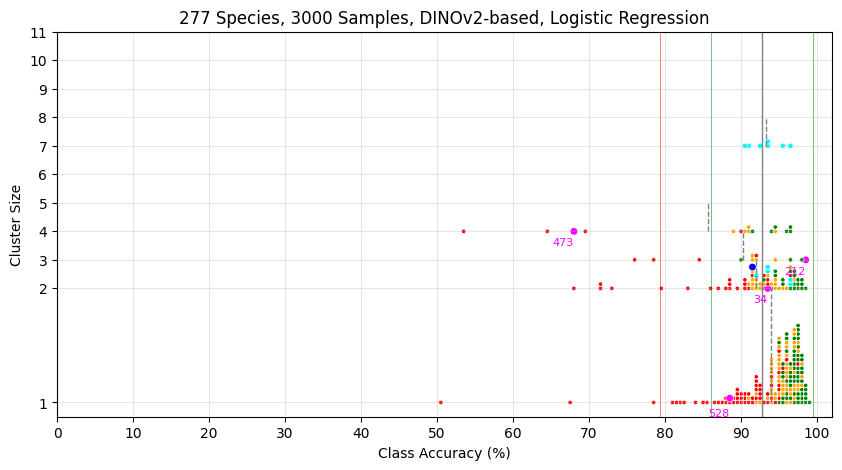

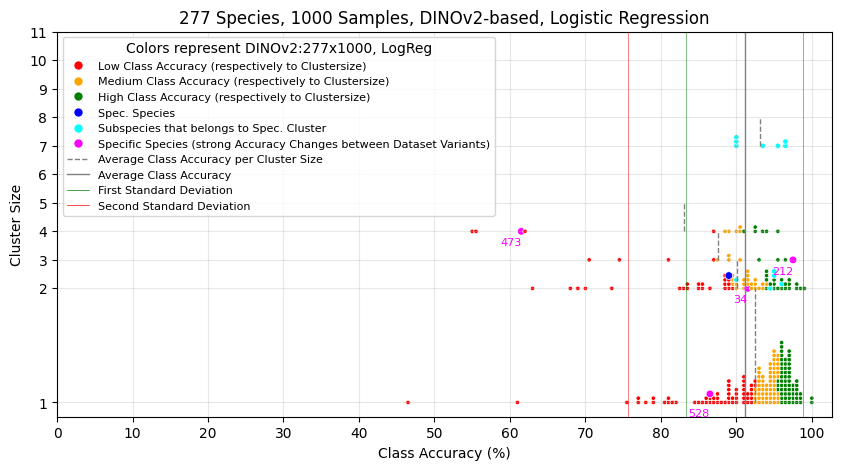

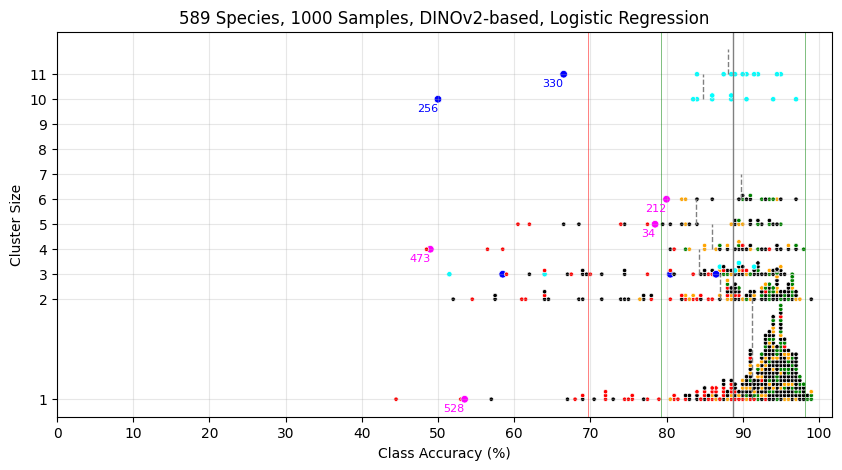

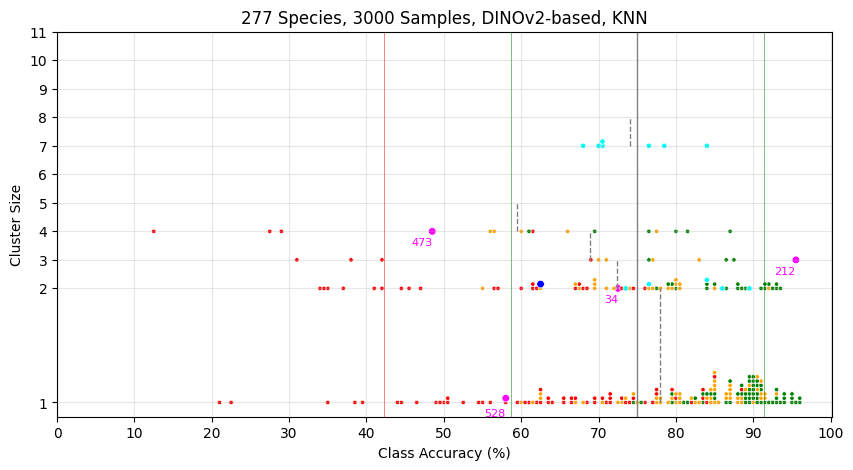

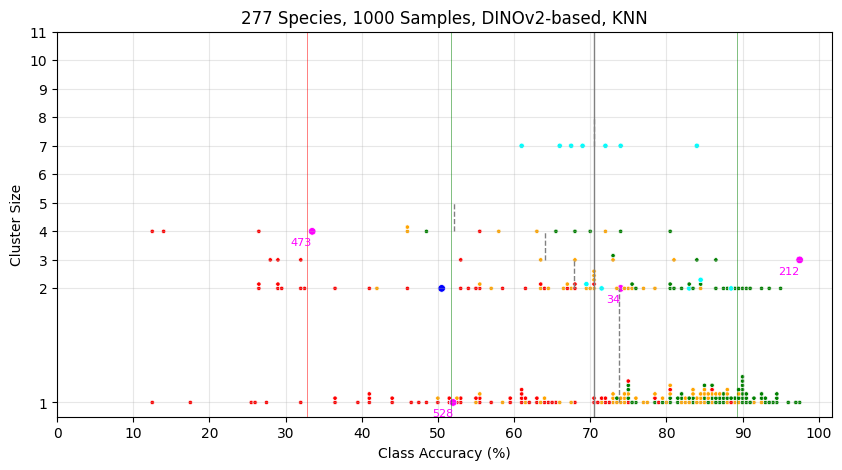

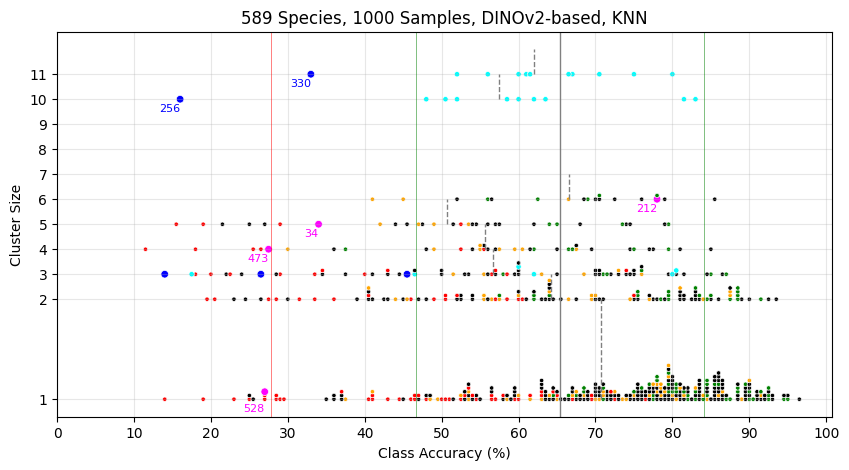

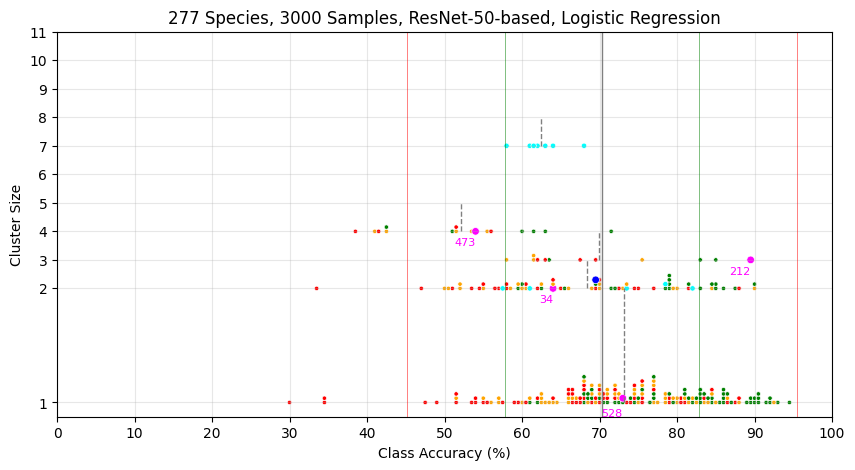

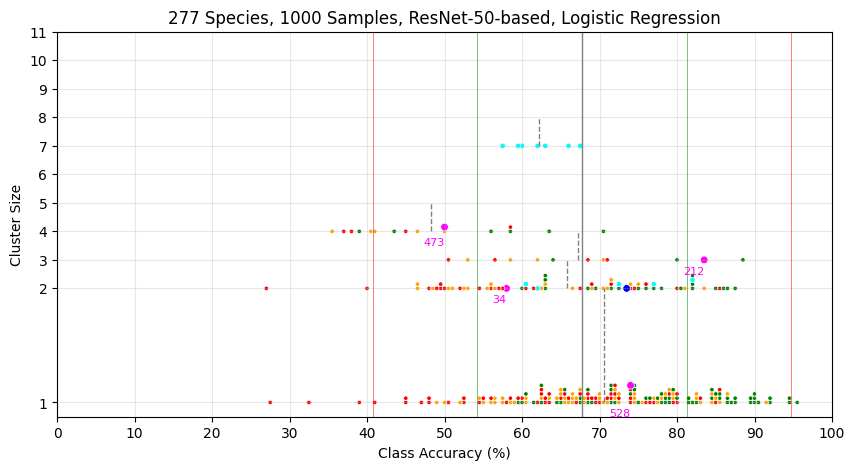

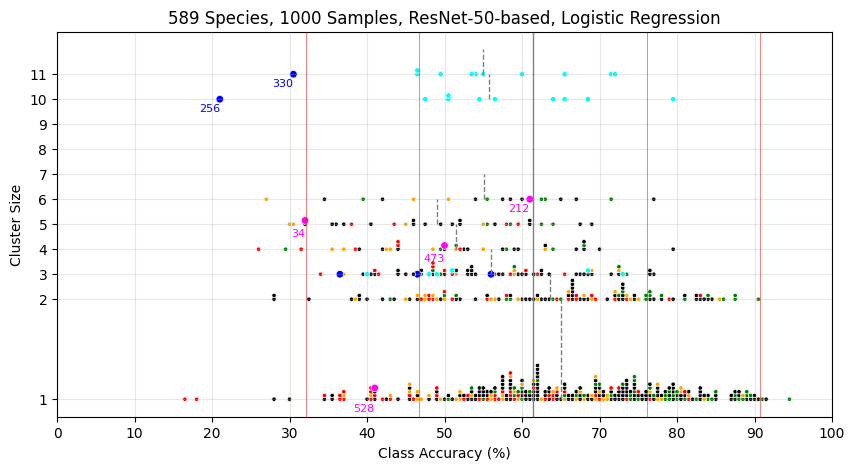

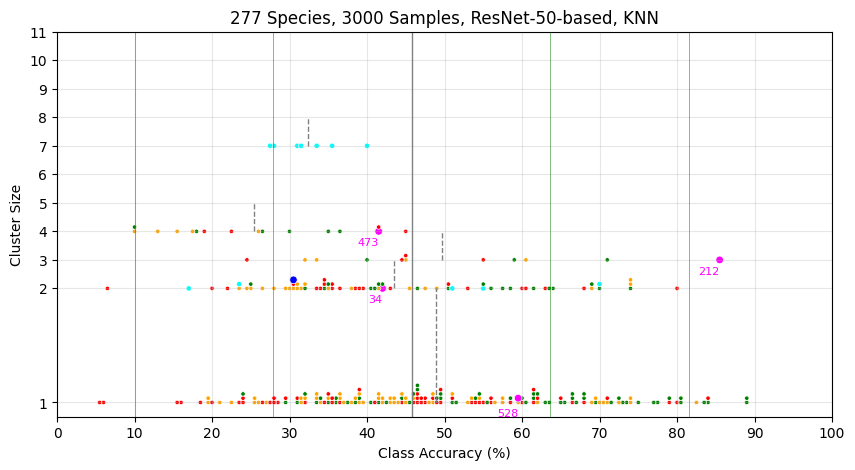

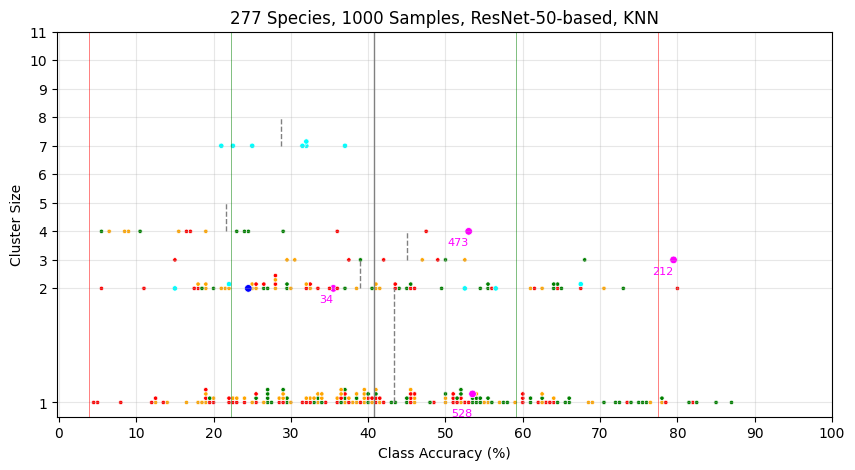

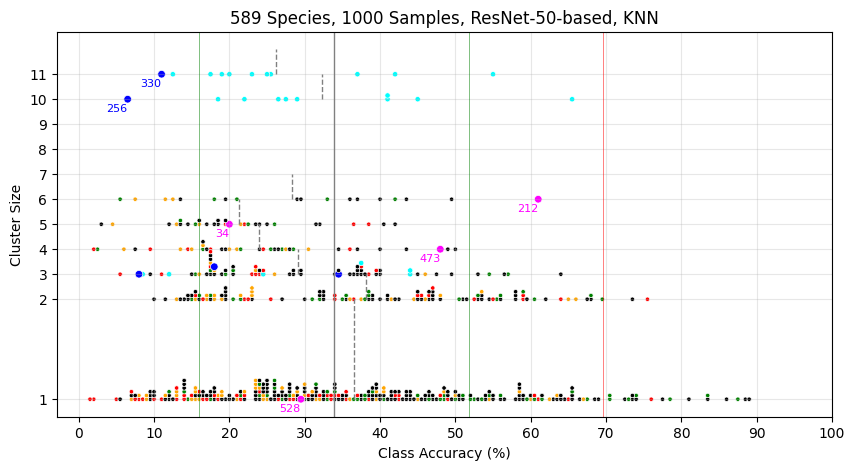

In [ ]:
for fm in ['dino', 'resnet']:
    for clf in ['Linear Classifier', 'KNN']:
        
        df1 = create_label_overview(fm, clf, 277, 3000)
        df2 = create_label_overview(fm, clf, 277, 1000)
        df3 = create_label_overview(fm, clf, 589, 1000)

        scatter_labels(df1)
        scatter_labels(df2)
        scatter_labels(df3)
        

In [ ]:
def analyze_misclassifications(df):
    misclassifications = {}
    
    for _, row in df.iterrows():
        label = row['Label']
        label_name = row['LabelName']
        genus = label_name.split(' ')[0]
        
        # Find all species in the same genus
        genus_species = [species for species in species_mapping.keys() if species.startswith(genus)]
        genus_labels = [species_mapping[species] for species in genus_species]
        
        # Parse the classification counts
        classification_counts = eval(row['ClassificationCounts'])[0:-1] # excluding 'Other' so only confusions that happened more than once are included
        #print(classification_counts)
        total_wrong = sum(count for pred_label, count in classification_counts if pred_label != label)
        within_cluster = sum(count for pred_label, count in classification_counts if pred_label in genus_labels and pred_label != label)
        outside_cluster = total_wrong - within_cluster
        
        misclassifications[label] = {
            'total_wrong': total_wrong,
            'within_cluster': within_cluster,
            'outside_cluster': outside_cluster
        }
    
    return misclassifications


In [ ]:
# Define the dataset variants
dataset_variants = [
    ('dino', 'Linear Classifier', 277, 1000),
    ('dino', 'Linear Classifier', 277, 3000),
    ('dino', 'Linear Classifier', 589, 1000),
    ('dino', 'KNN', 277, 1000),
    ('dino', 'KNN', 277, 3000),
    ('dino', 'KNN', 589, 1000),
    ('resnet', 'Linear Classifier', 277, 1000),
    ('resnet', 'Linear Classifier', 277, 3000),
    ('resnet', 'Linear Classifier', 589, 1000),
    ('resnet', 'KNN', 277, 1000),
    ('resnet', 'KNN', 277, 3000),
    ('resnet', 'KNN', 589, 1000)
]

# Define the cluster sizes to include in the dataframe
cluster_sizes = [1, 2, 3, 4, 5, 6, 7, 10, 11]
observed_classes = [528, 34, 212, 473, 256, 330]

# Initialize an empty list to store the results
results = []

# Iterate over each dataset variant
for fm, clf, species, samples in dataset_variants:
    # Create the label overview dataframe for the current variant
    df = create_label_overview(fm, clf, species, samples)
    

    # Initialize a dictionary to store the results for the current variant
    result = {
        'FoundationalModel': fm,
        'Model': clf,
        'Species': species,
        'Samples': samples,
        'MeanAccuracy': df['ClassAccuracy'].mean(),
        'StdAccuracy': df['ClassAccuracy'].std()
    }


    df['ClassificationCountsNum'] = df['ClassificationCounts'].apply(lambda x: len(eval(x)))
    misclas_df = df[df['Label'].isin(observed_classes)][['Label', 'LabelName','ClassAccuracy','ClassificationCounts']].drop_duplicates()

    misclassifications = analyze_misclassifications(misclas_df)
    # Add the class accuracies for the observed classes
    for observed_class in observed_classes:
        result[f'ClassAccuracy_{observed_class}'] = df[df['Label'] == observed_class]['ClassAccuracy'].values[0] if observed_class in df['Label'].values else None
        result[f'MisclasNum_{observed_class}'] = df[df['Label'] == observed_class]['ClassificationCountsNum'].values[0] -2 if observed_class in df['Label'].values else None
        result[f'MisclasInside_{observed_class}'] = misclassifications[observed_class]['within_cluster'] if observed_class in df['Label'].values else None
        result[f'MisclasOutside_{observed_class}'] = misclassifications[observed_class]['outside_cluster'] if observed_class in df['Label'].values else None

    
    # Add the average class accuracy for each cluster size
    for cluster_size in cluster_sizes:
        cluster_df = df[df['ClusterSize'] == cluster_size]
        result[f'ClusterSize_{cluster_size}'] = cluster_df['ClassAccuracy'].mean() if not cluster_df.empty else None
    
    # Append the result to the results list
    results.append(result)

# Create a dataframe from the results list
results_df = pd.DataFrame(results)

# results_df['MeanAccuracy'] = results_df.groupby(['FoundationalModel', 'Model'])['MeanAccuracy'].transform('mean')
# results_df['StdAccuracy'] = results_df.groupby(['FoundationalModel', 'Model'])['StdAccuracy'].transform('mean')

#results_df.to_csv(PATH_TO_DATA + 'combined_results/class_accuracy_analysis.csv', index=False)

In [ ]:
pd.set_option('display.max_columns', None)
results_df

FoundationalModel              Model  Species  Samples  MeanAccuracy  \
0               dino  Linear Classifier      277     1000      0.911173   
1               dino  Linear Classifier      277     3000      0.928014   
2               dino  Linear Classifier      589     1000      0.886978   
3               dino                KNN      277     1000      0.704928   
4               dino                KNN      277     3000      0.750199   
5               dino                KNN      589     1000      0.653905   
6             resnet  Linear Classifier      277     1000      0.677419   
7             resnet  Linear Classifier      277     3000      0.703069   
8             resnet  Linear Classifier      589     1000      0.614321   
9             resnet                KNN      277     1000      0.406913   
10            resnet                KNN      277     3000      0.457726   
11            resnet                KNN      589     1000      0.339015   

    StdAccuracy  ClassAccuracy_528  MisclasNum_528  MisclasInside_528  \
0      0.077366              0.865               5                  0   
1      0.067129              0.885               8                  0   
2      0.094855              0.535              12                  0   
3      0.188130              0.520              20                  0   
4      0.163929              0.580              31                  0   
5      0.187687              0.270              23                  0   
6      0.135027              0.740               8                  0   
7      0.125648              0.730              18                  0   
8      0.146625              0.410              19                  0   
9      0.183917              0.535              12                  0   
10     0.178642              0.595              25                  0   
11     0.178719              0.295              23                  0   

    MisclasOutside_528  ClassAccuracy_34  MisclasNum_34  MisclasInside_34  \
0                   21             0.915              2                 6   
1                   58             0.935              5                14   
2                   84             0.785              6                24   
3                   81             0.740              6                19   
4                  238             0.725             15                58   
5                  127             0.340             11                88   
6                   45             0.580             11                13   
7                  149             0.640             15                43   
8                  110             0.320             21                50   
9                   81             0.355             14                22   
10                 225             0.420             21                56   
11                 128             0.200             19                69   

    MisclasOutside_34  ClassAccuracy_212  MisclasNum_212  MisclasInside_212  \
0                   5              0.975               0                  0   
1                  17              0.985               0                  0   
2                  15              0.800               2                 36   
3                  26              0.975               0                  0   
4                  93              0.955               2                  8   
5                  34              0.780               2                 36   
6                  56              0.835               6                  4   
7                 149              0.895              14                 12   
8                  68              0.610               8                 54   
9                  93              0.795               9                  0   
10                269              0.855              18                  9   
11                 71              0.610              14                 36   

    MisclasOutside_212  ClassAccuracy_473  Misc

##### 

In [ ]:
# Define the dataset variants
dataset_variants = [
    ('dino', 'Linear Classifier', 277, 1000),
    ('dino', 'Linear Classifier', 277, 3000),
    ('resnet', 'Linear Classifier', 277, 1000),
    ('resnet', 'Linear Classifier', 277, 3000),
    ('dino', 'KNN', 277, 1000),
    ('dino', 'KNN', 277, 3000),
    ('resnet', 'KNN', 277, 1000),
    ('resnet', 'KNN', 277, 3000)
]

# Initialize an empty list to store the results
results = []

# Iterate over each dataset variant
for fm, clf, species, samples in dataset_variants:
    # Create the label overview dataframe for the current variant
    df = create_label_overview(fm, clf, species, samples)
    
    # Initialize a dictionary to store the results for the current variant
    result = {
        'FoundationalModel': fm,
        'Model': clf,
        'Species': species,
        'Samples': samples
    }

    # Calculate the average class accuracy for each cluster size
    for cluster_size in range(1, 7):
        cluster_df = df[df['ClusterSize'] == cluster_size]
        result[f'ClusterSize_{cluster_size}_MeanAccuracy'] = cluster_df['ClassAccuracy'].mean() if not cluster_df.empty else None
    
    # Append the result to the results list
    results.append(result)

# Create a dataframe from the results list
results_df = pd.DataFrame(results)

# Merge the results for 277x1000 and 277x3000
merged_results = results_df.merge(
    results_df[results_df['Samples'] == 3000],
    on=['FoundationalModel', 'Model', 'Species'],
    suffixes=('_1000', '_3000')
)

# Calculate the increase in accuracy for each cluster size
for cluster_size in range(1, 7):
    merged_results[f'ClusterSize_{cluster_size}_AccuracyIncrease'] = (
        merged_results[f'ClusterSize_{cluster_size}_MeanAccuracy_3000'] - 
        merged_results[f'ClusterSize_{cluster_size}_MeanAccuracy_1000']
    )

# Find the maximum and minimum increase in accuracy per cluster size for each clf-fm combination
max_increase = merged_results[[f'ClusterSize_{cluster_size}_AccuracyIncrease' for cluster_size in range(1, 7)]].max(axis=1)
min_increase = merged_results[[f'ClusterSize_{cluster_size}_AccuracyIncrease' for cluster_size in range(1, 7)]].min(axis=1)

# Add the results to the dataframe
merged_results['MaxAccuracyIncrease'] = max_increase
merged_results['MinAccuracyIncrease'] = min_increase

# Display the results
print(merged_results[['FoundationalModel', 'Model', 'MaxAccuracyIncrease', 'MinAccuracyIncrease']])

  FoundationalModel              Model MaxAccuracyIncrease MinAccuracyIncrease
0              dino  Linear Classifier            0.026667            0.015233
1              dino  Linear Classifier                 0.0                 0.0
2            resnet  Linear Classifier             0.03875            0.025262
3            resnet  Linear Classifier                 0.0                 0.0
4              dino                KNN            0.073125            0.042733
5              dino                KNN                 0.0                 0.0
6            resnet                KNN            0.054855            0.039062
7            resnet                KNN                 0.0                 0.0


##### Finding pictures for the species that were confused with each other

In [ ]:
# print(get_gbifids_for_class(34, confidences_csv, 5))
# print(get_gbifids_for_class(32, confidences_csv, 5))
# print(get_gbifids_for_class(166, confidences_csv, 5))

# print(get_gbifids_for_class(212, confidences_csv, 5))
# print(get_gbifids_for_class(215, confidences_csv, 5))
# print(get_gbifids_for_class(211, confidences_csv, 5))

# print(get_gbifids_for_class(473, confidences_csv, 5))
# print(get_gbifids_for_class(475, confidences_csv, 5))
# print(get_gbifids_for_class(472, confidences_csv, 5))

# print(get_gbifids_for_class(528, confidences_csv, 5))
# print(get_gbifids_for_class(271 , confidences_csv, 5))
# print(get_gbifids_for_class(272 , confidences_csv, 5))

In [ ]:
# show_sample_by_id(3717772501, confidences_csv)
# show_sample_by_id(4881198101, confidences_csv)
# show_sample_by_id(4890526603, confidences_csv)

# show_sample_by_id(3997271114, confidences_csv)
# show_sample_by_id(2837482917, confidences_csv)
# show_sample_by_id(4160499365, confidences_csv)

# show_sample_by_id(4883560699, confidences_csv)
# show_sample_by_id(4409299347, confidences_csv)
# show_sample_by_id(4409396785, confidences_csv)

# show_sample_by_id(4409388452, confidences_csv)
# show_sample_by_id(3997395183, confidences_csv)
# show_sample_by_id(3904764374, confidences_csv)


##### Spec Cluster Confusion Matrices

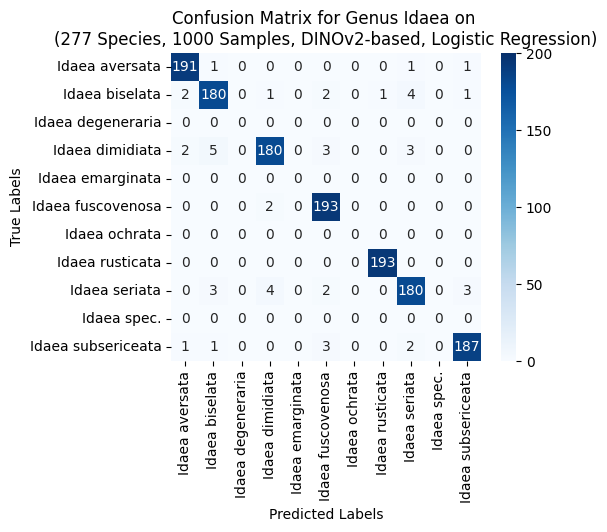

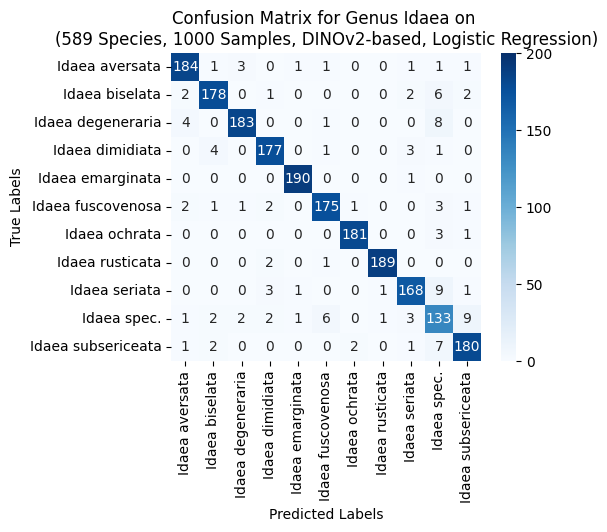

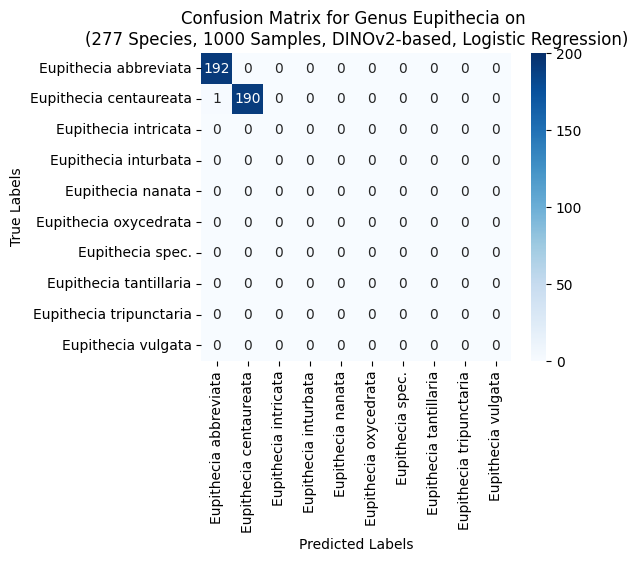

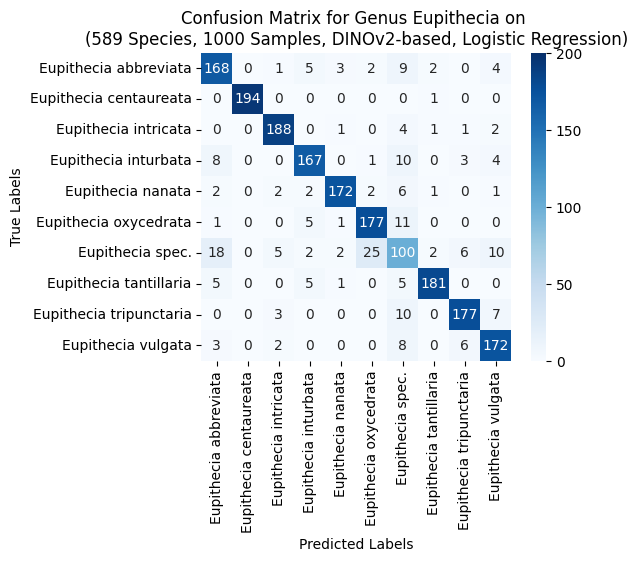

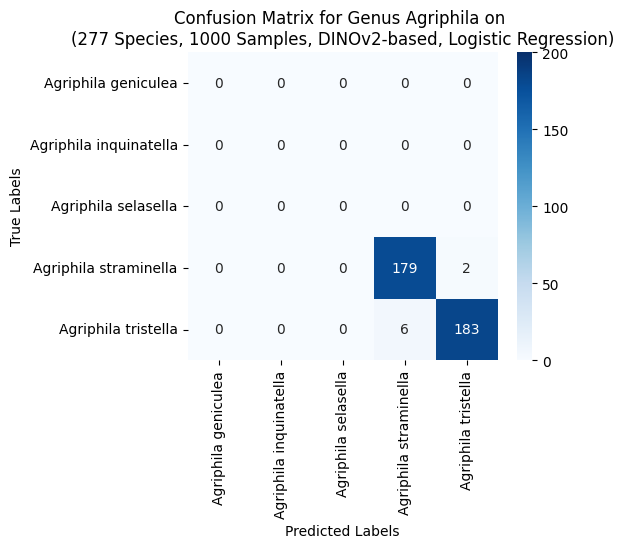

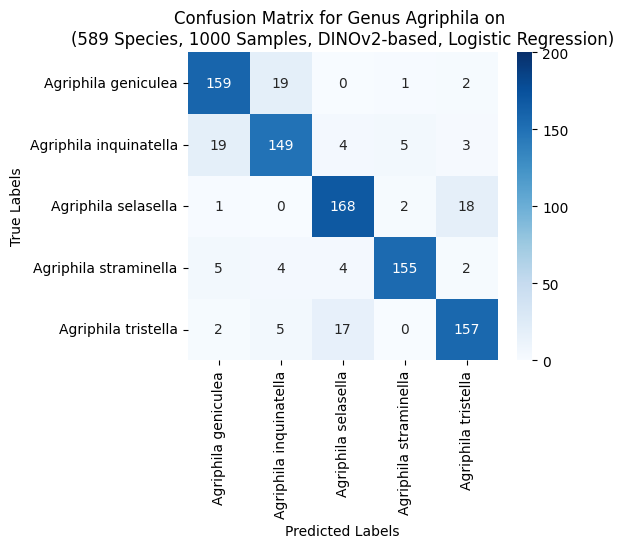

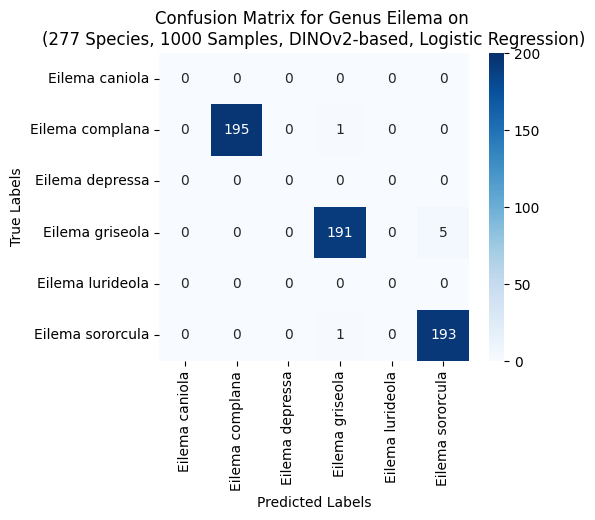

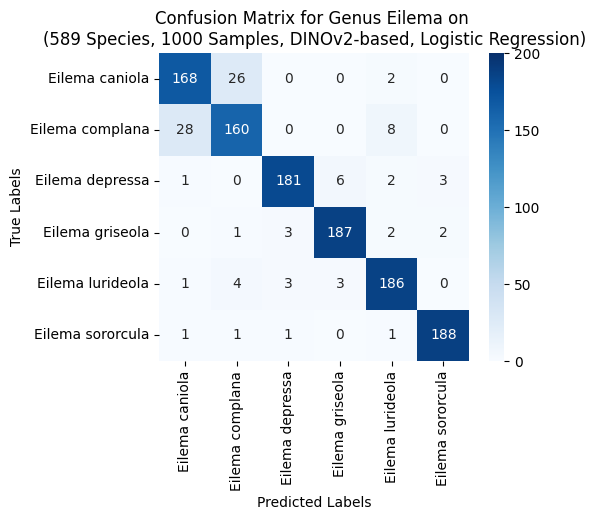

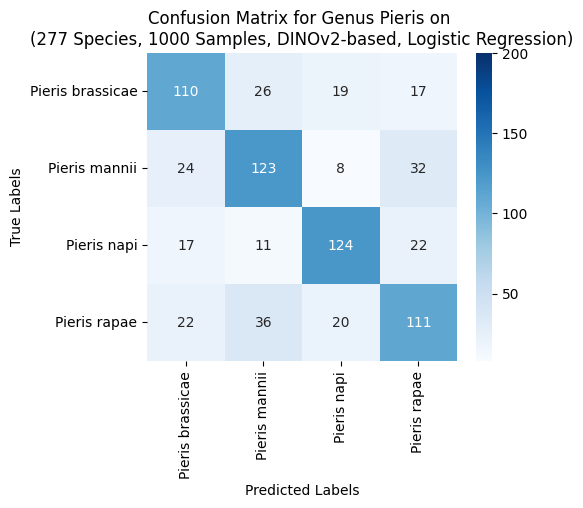

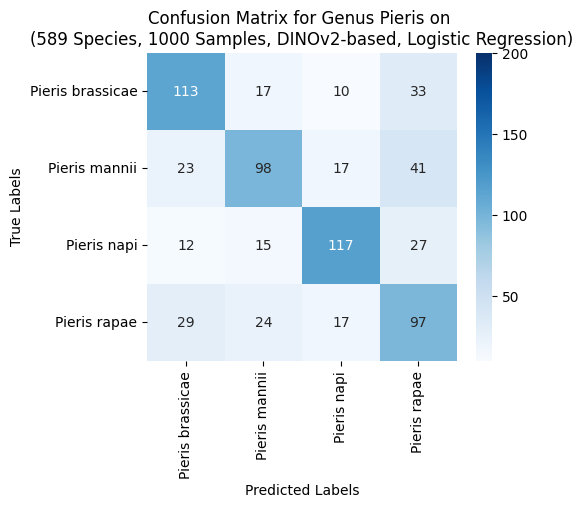

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix for a given genus
def plot_confusion_matrix_for_genus(genus, confidences_csv, species_mapping):
    # Filter the dataframe for the specific genus
    genus_species = [species for species in species_mapping.keys() if species.startswith(genus)]
    genus_labels = [species_mapping[species] for species in genus_species]
    
    
    # Filter the dataframe for the specific genus
    filtered_df = confidences_csv[confidences_csv['Label'].isin(genus_labels) | confidences_csv['PredictedLabel'].isin(genus_labels)]
    
    # Extract the true labels and predicted labels
    true_labels = filtered_df['Label']
    predicted_labels = filtered_df['PredictedLabel']

    # Create the confusion matrix   
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=genus_labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=genus_species, yticklabels=genus_species, vmax=200, cbar_kws={'ticks': [0, 50, 100, 150, 200]})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f"Confusion Matrix for Genus {genus} on \n({confidences_csv['Species'].iloc[0]} Species, {confidences_csv['Samples'].iloc[0]} Samples, {'DINOv2' if confidences_csv['FoundationalModel'].iloc[0] == 'dino' else 'ResNet-50'}-based, {'KNN' if confidences_csv['Species'].iloc[0] == 'KNN' else 'Logistic Regression'})")
    plt.show()

# Iterate through each genus and plot the confusion matrix
fm = 'dino'
clf = 'Linear Classifier'
samples = 1000
genera_with_more_than_one = ['Idaea', 'Eupithecia', 'Agriphila','Eilema', 'Pieris']
df_for_matrix277 = confidences_csv[(confidences_csv['Species'] == 277) & (confidences_csv['Samples'] == samples) & (confidences_csv['FoundationalModel'] == fm) & (confidences_csv['Model'] == clf)]
df_for_matrix589 = confidences_csv[(confidences_csv['Species'] == 589) & (confidences_csv['Samples'] == samples) & (confidences_csv['FoundationalModel'] == fm) & (confidences_csv['Model'] == clf)]

for genus in genera_with_more_than_one:
    plot_confusion_matrix_for_genus(genus, df_for_matrix277, species_mapping)
    plot_confusion_matrix_for_genus(genus, df_for_matrix589, species_mapping)


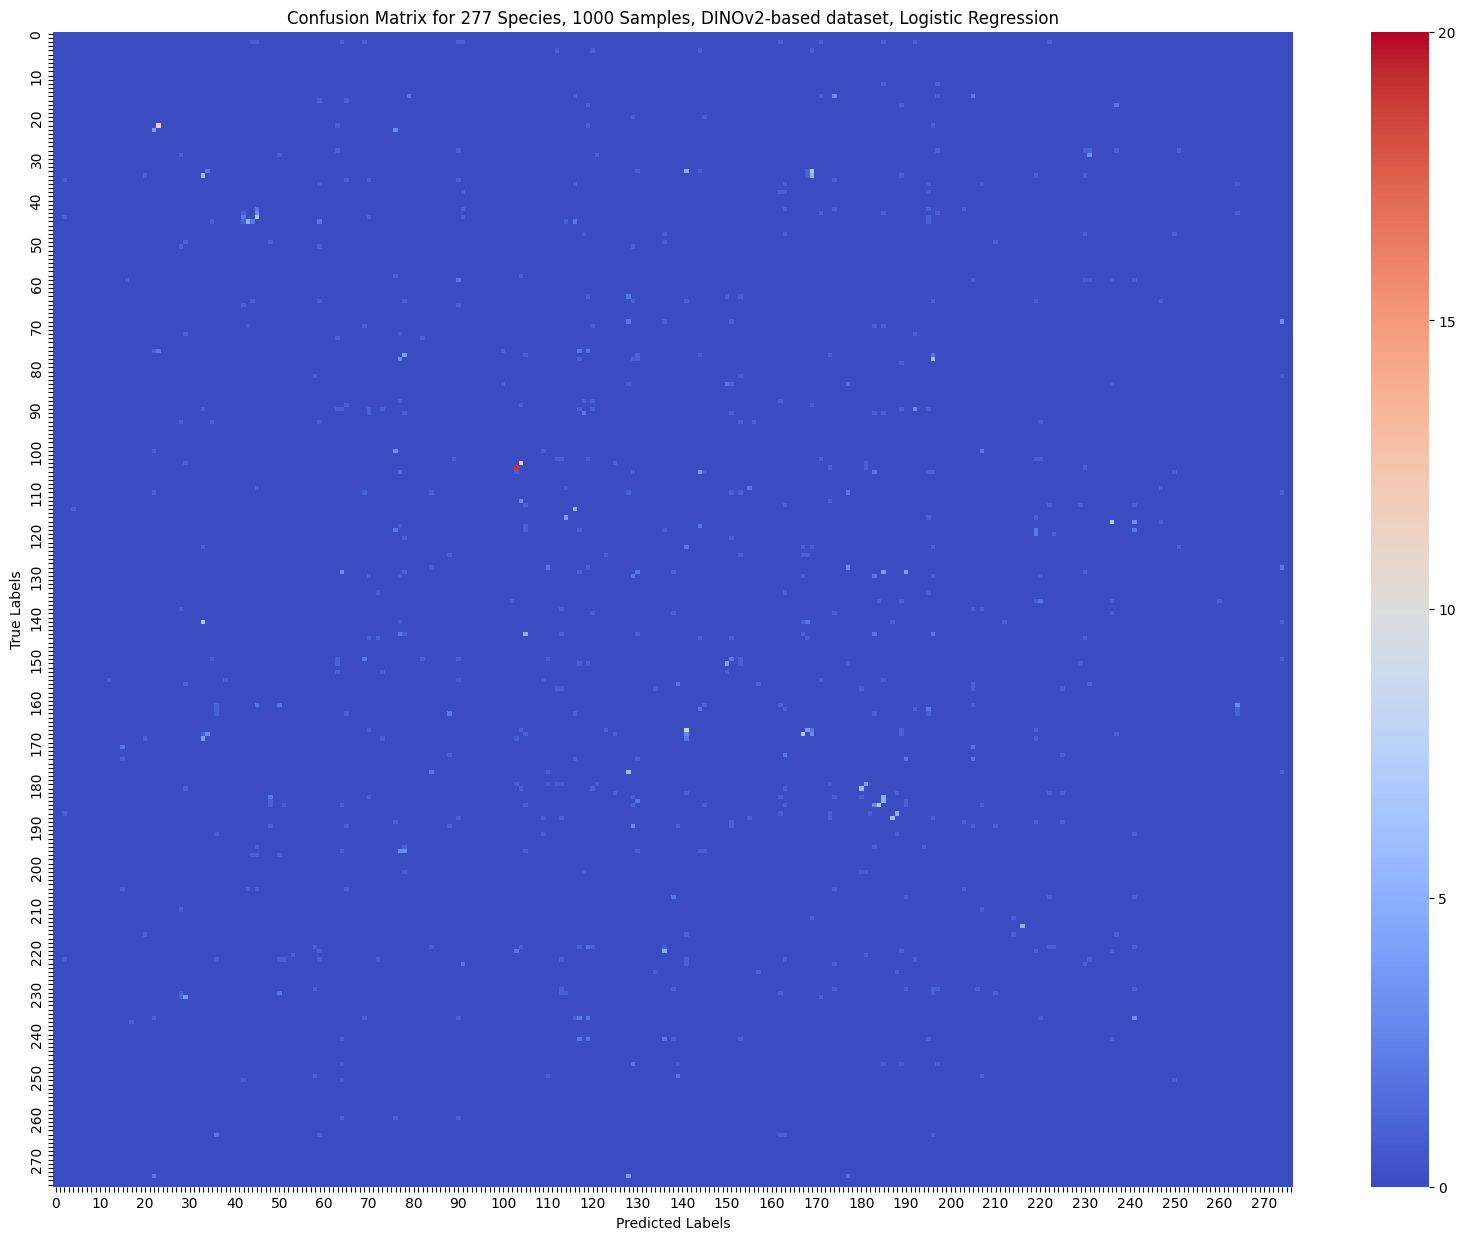

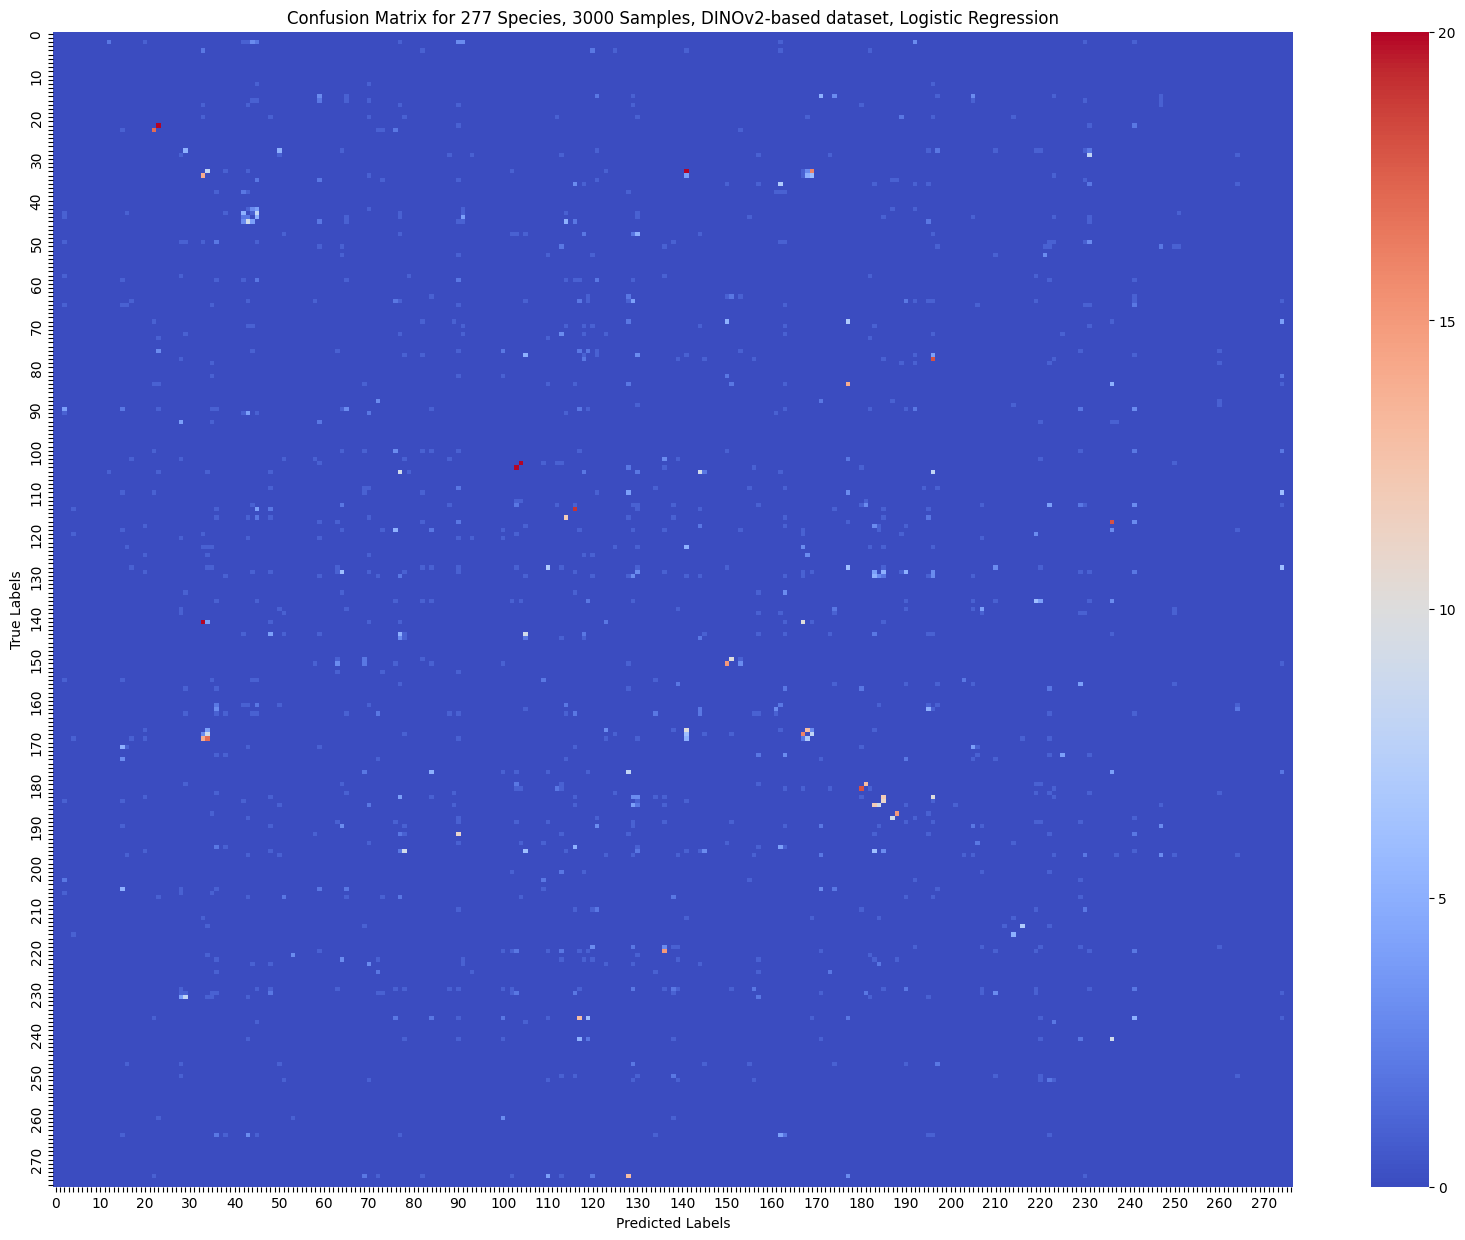

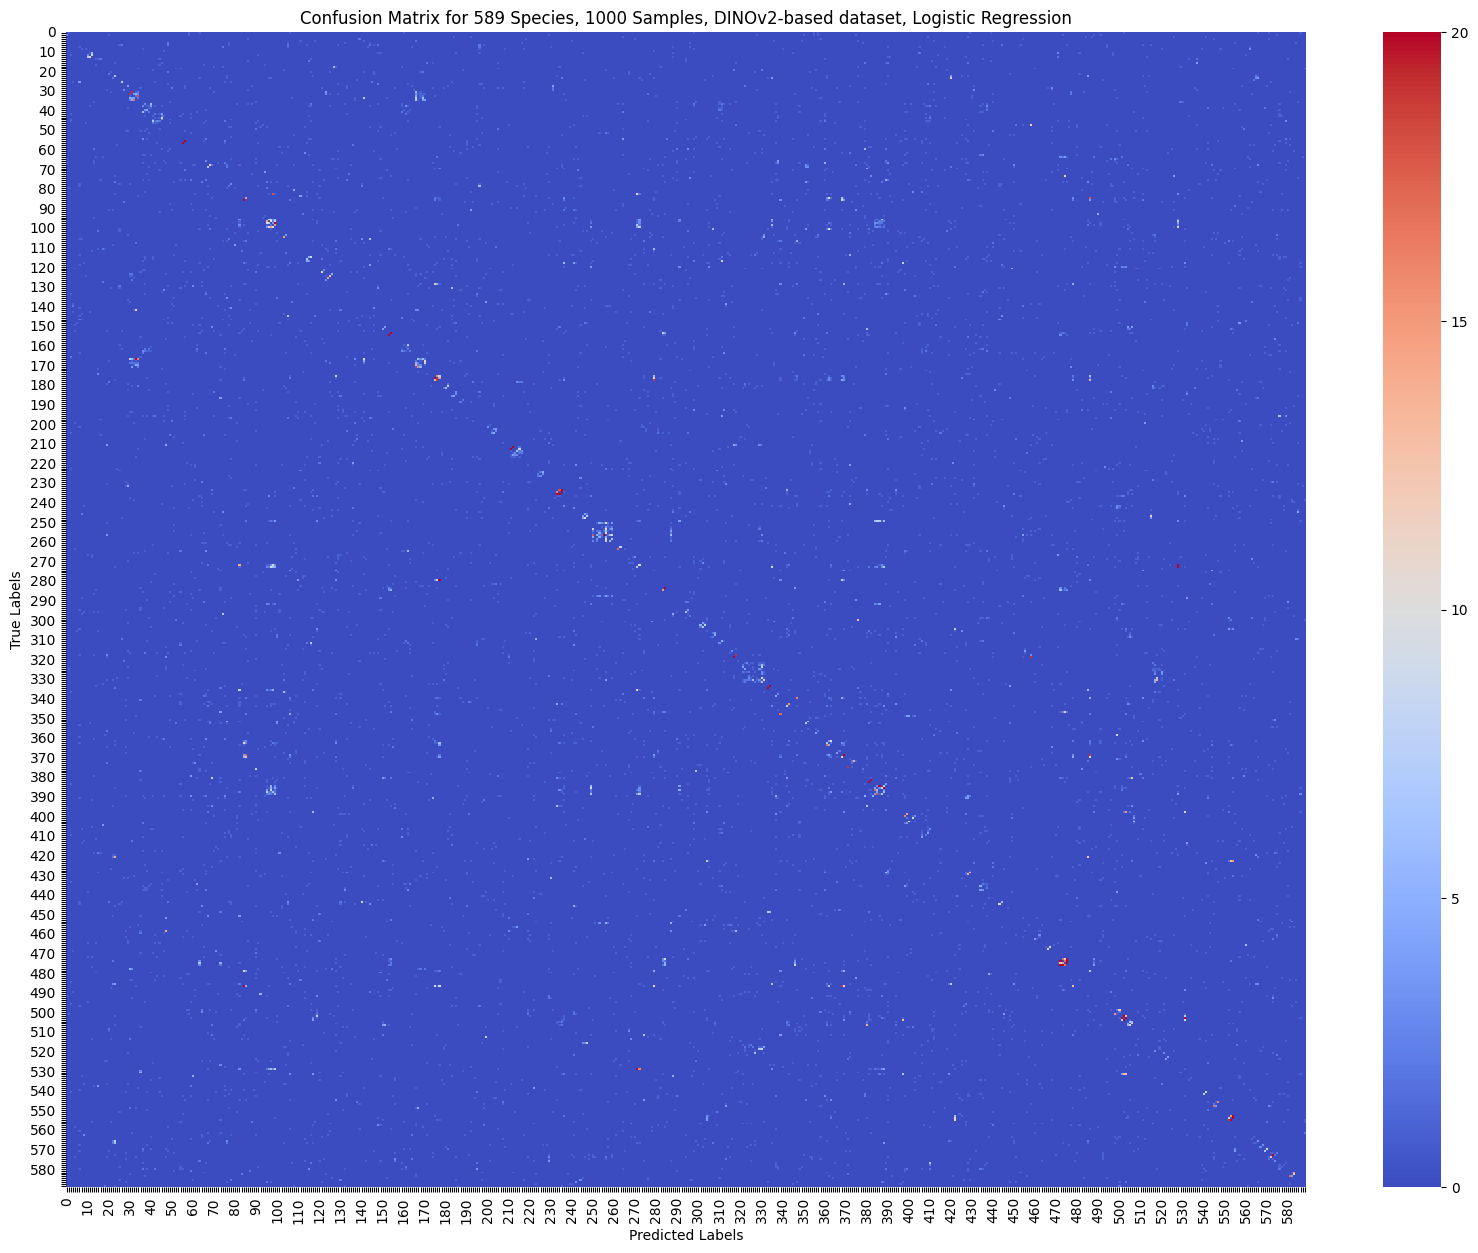

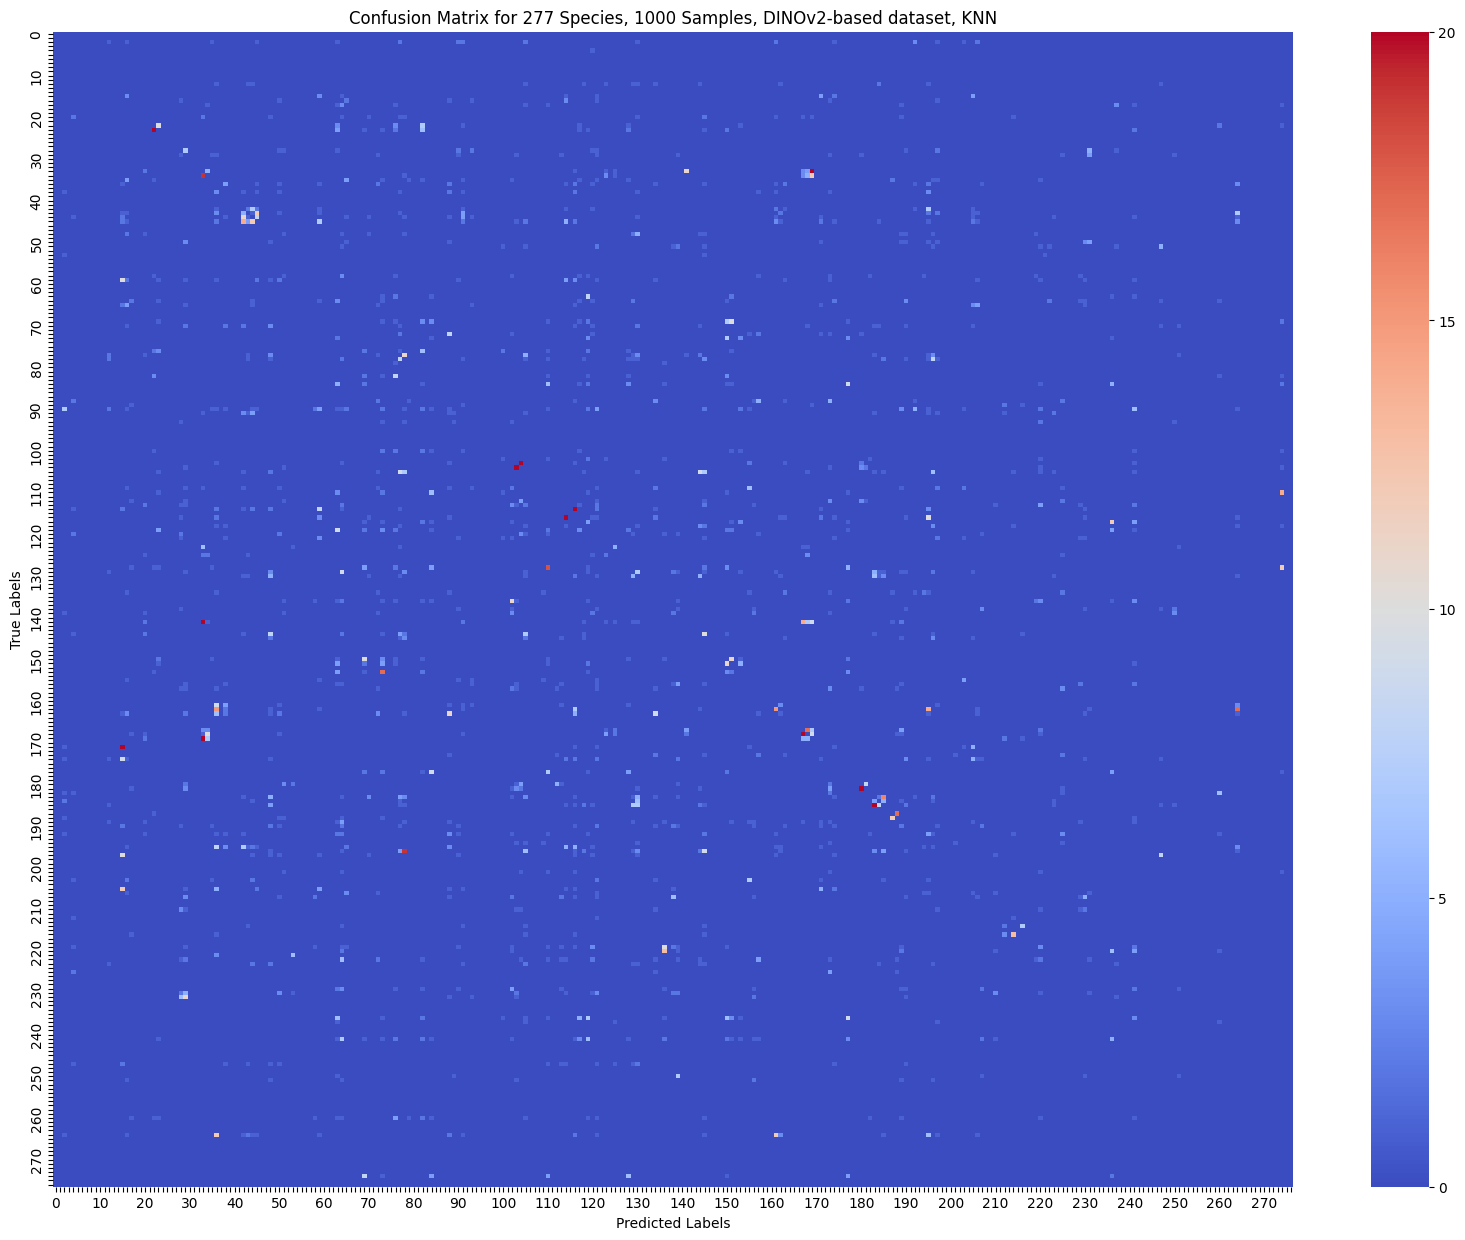

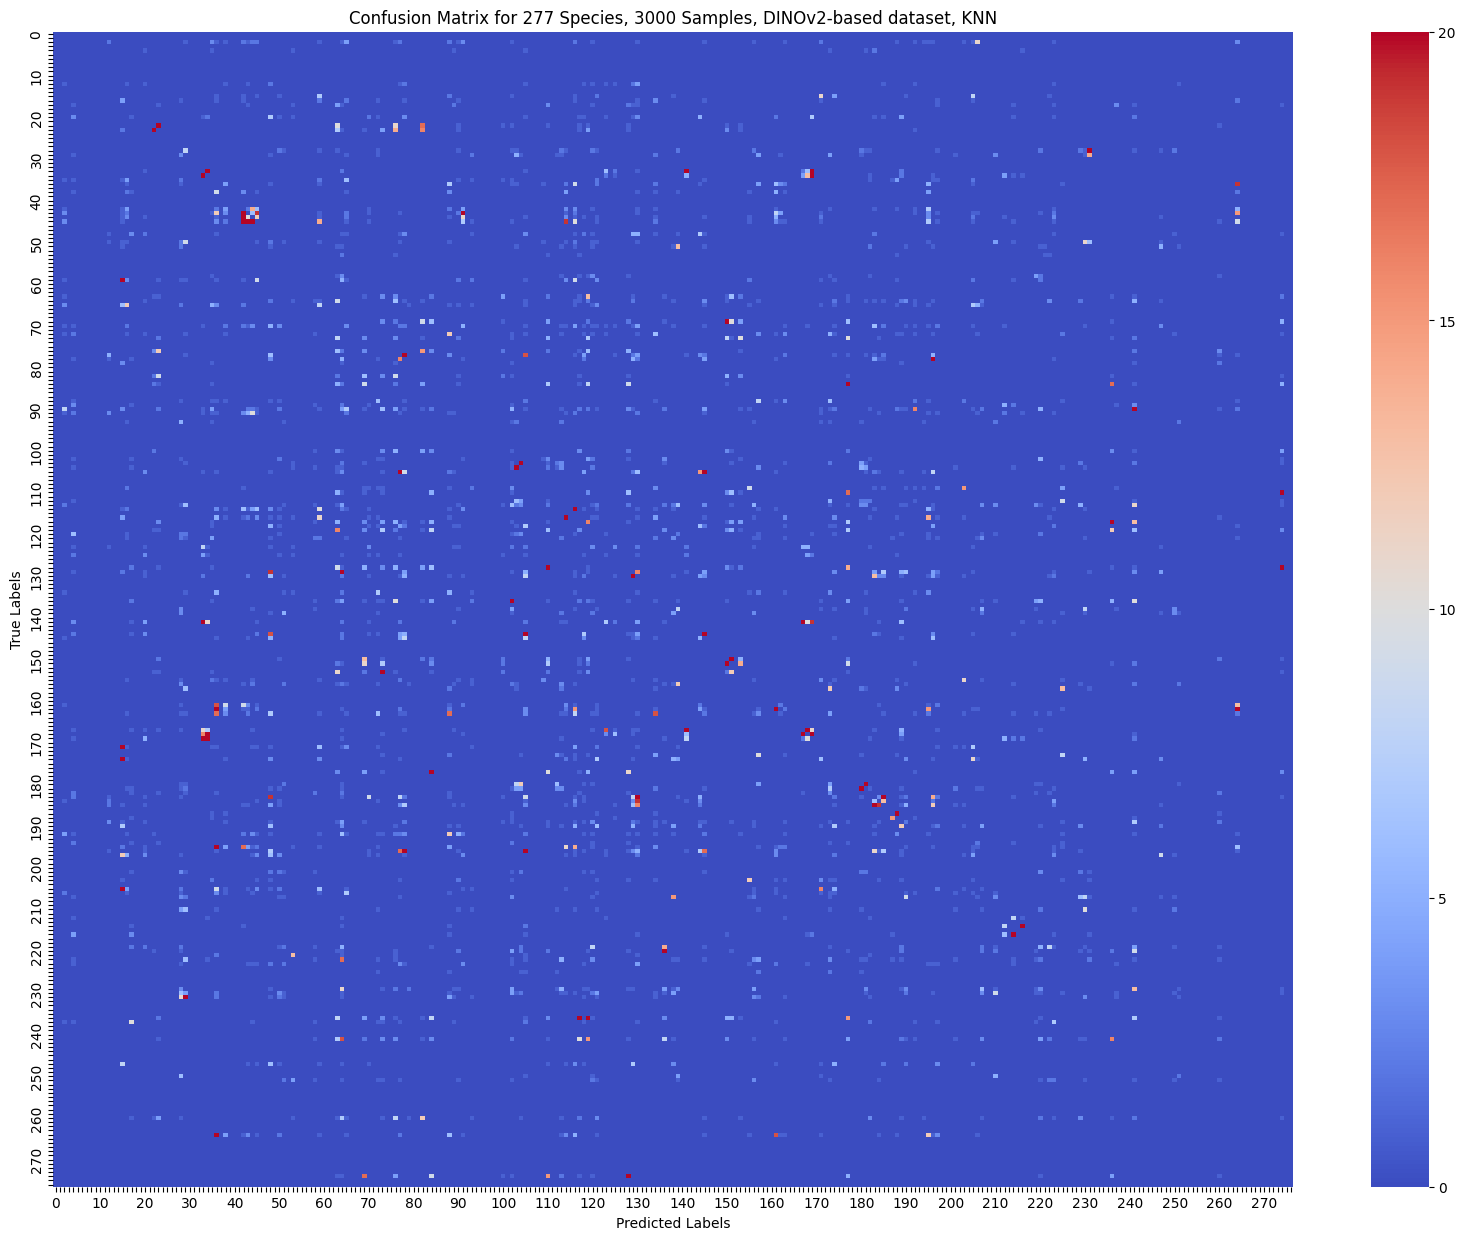

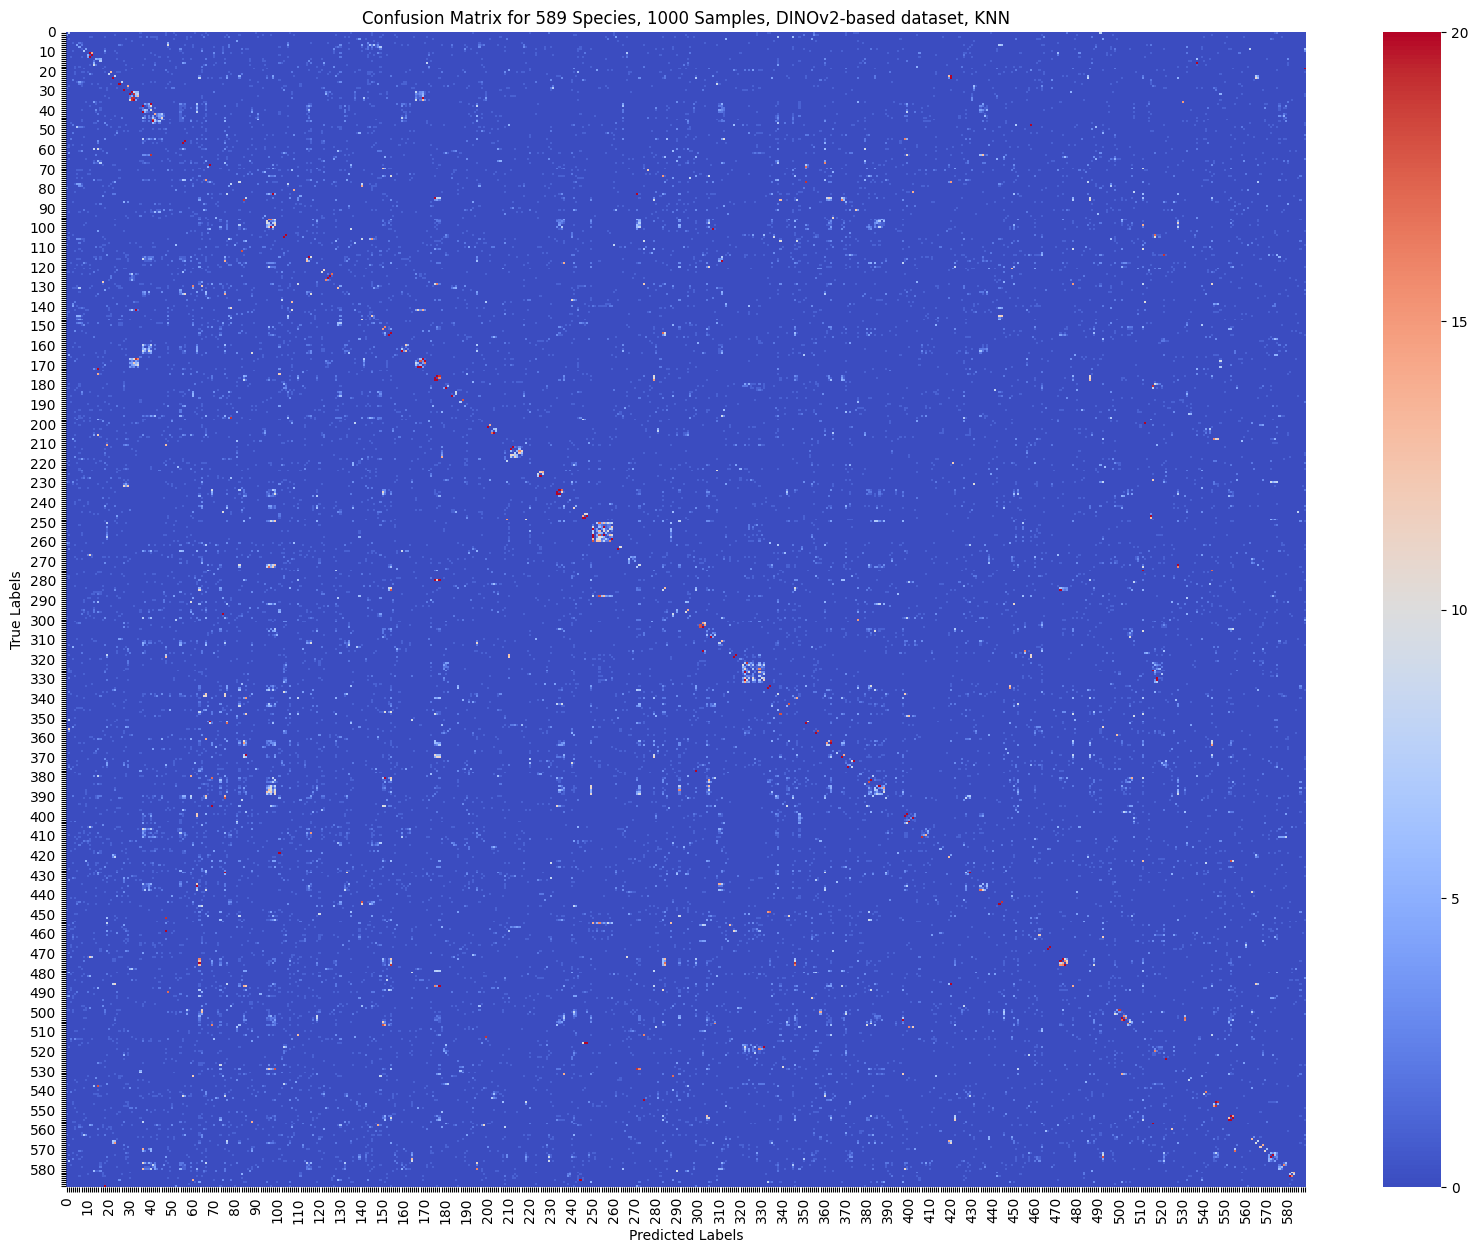

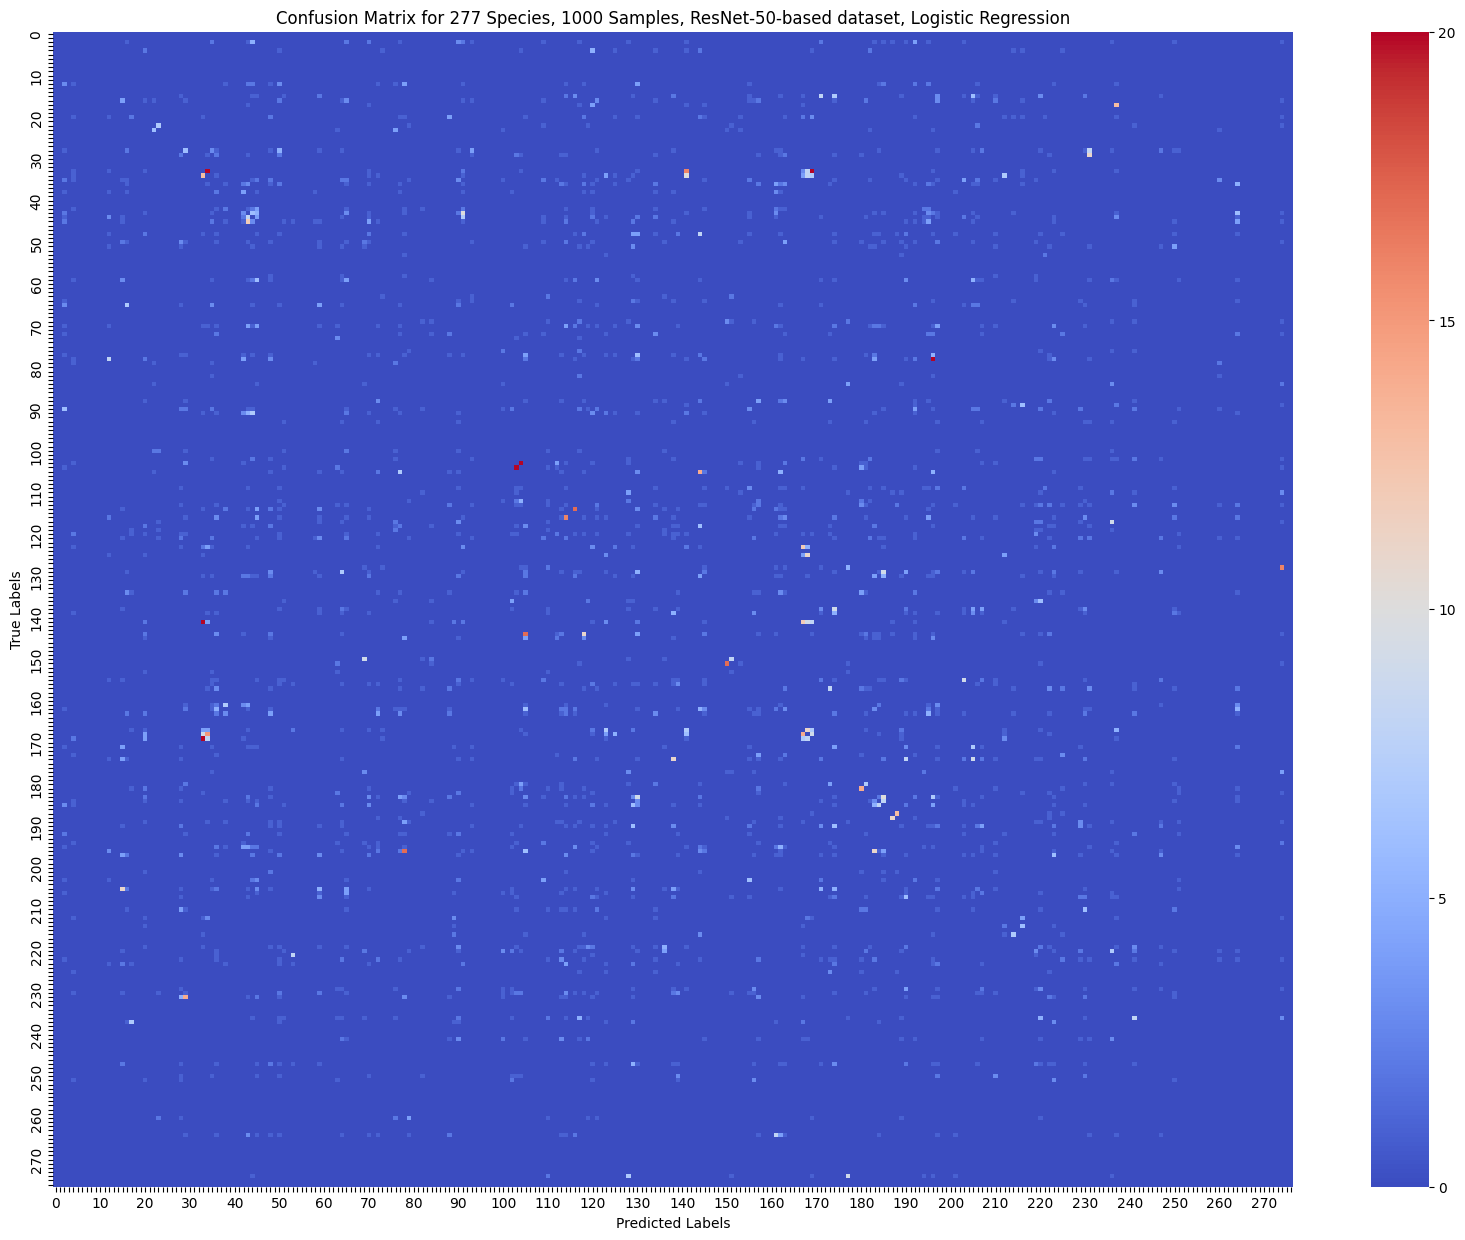

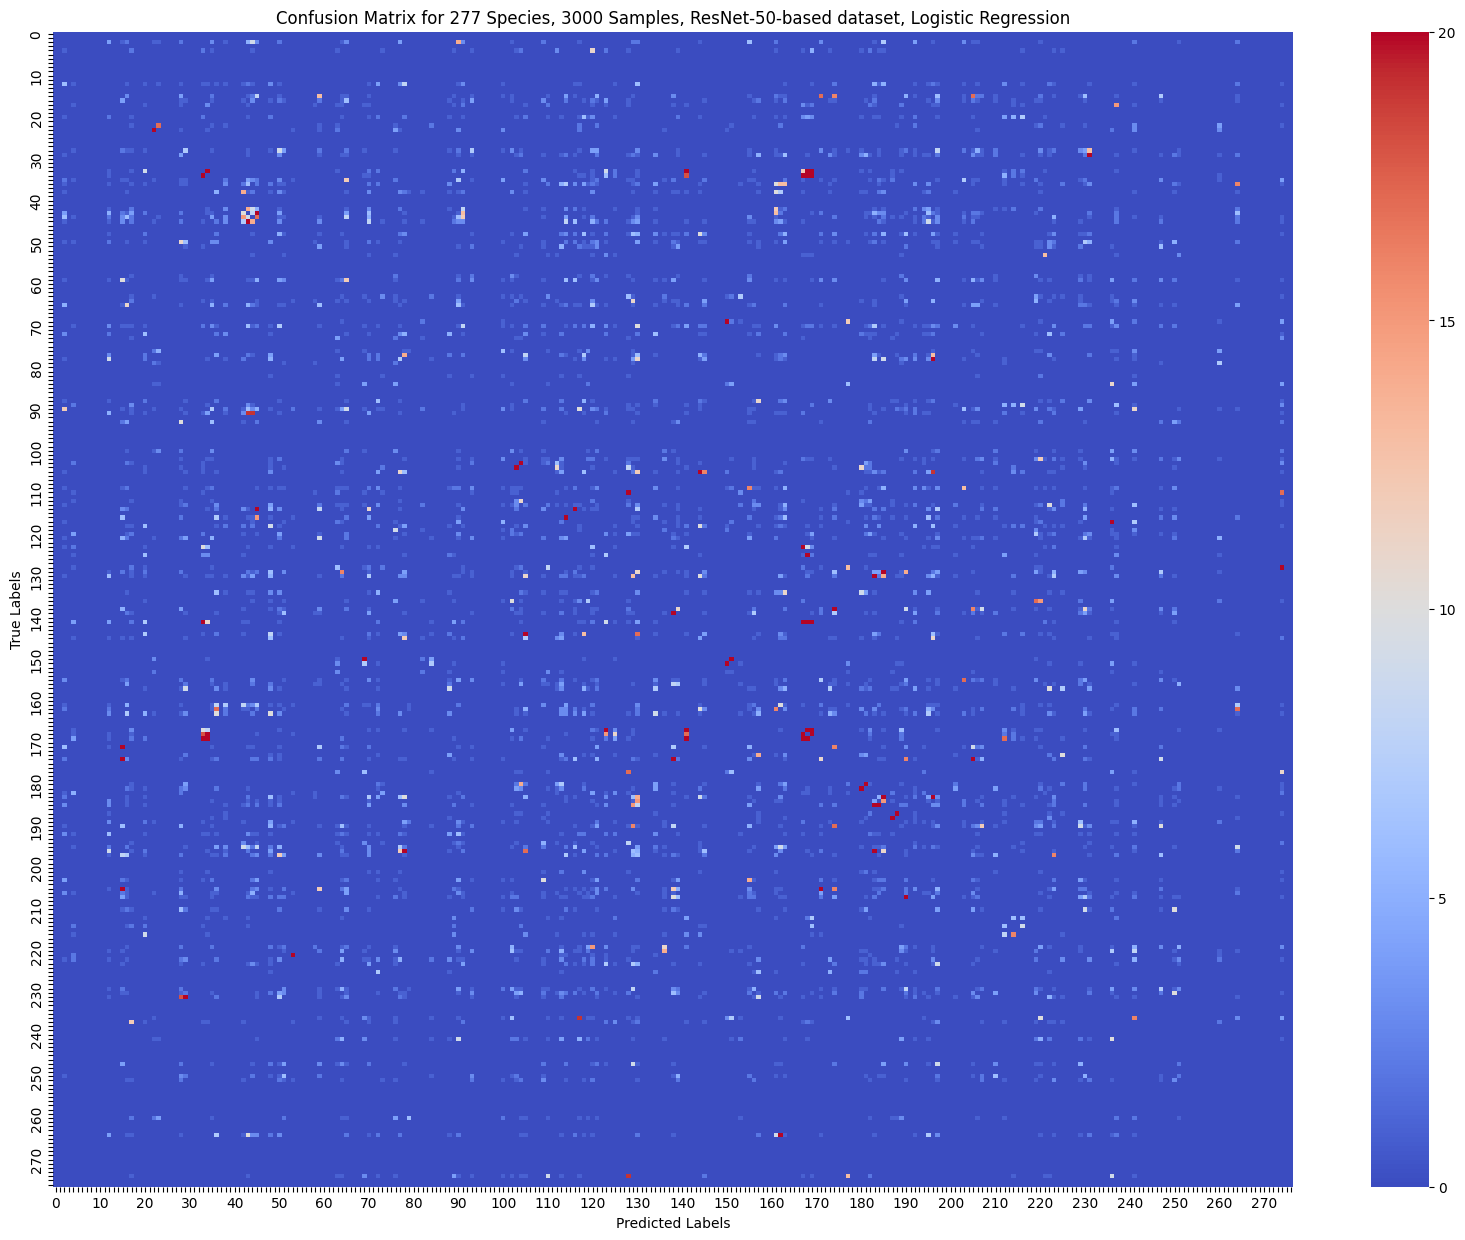

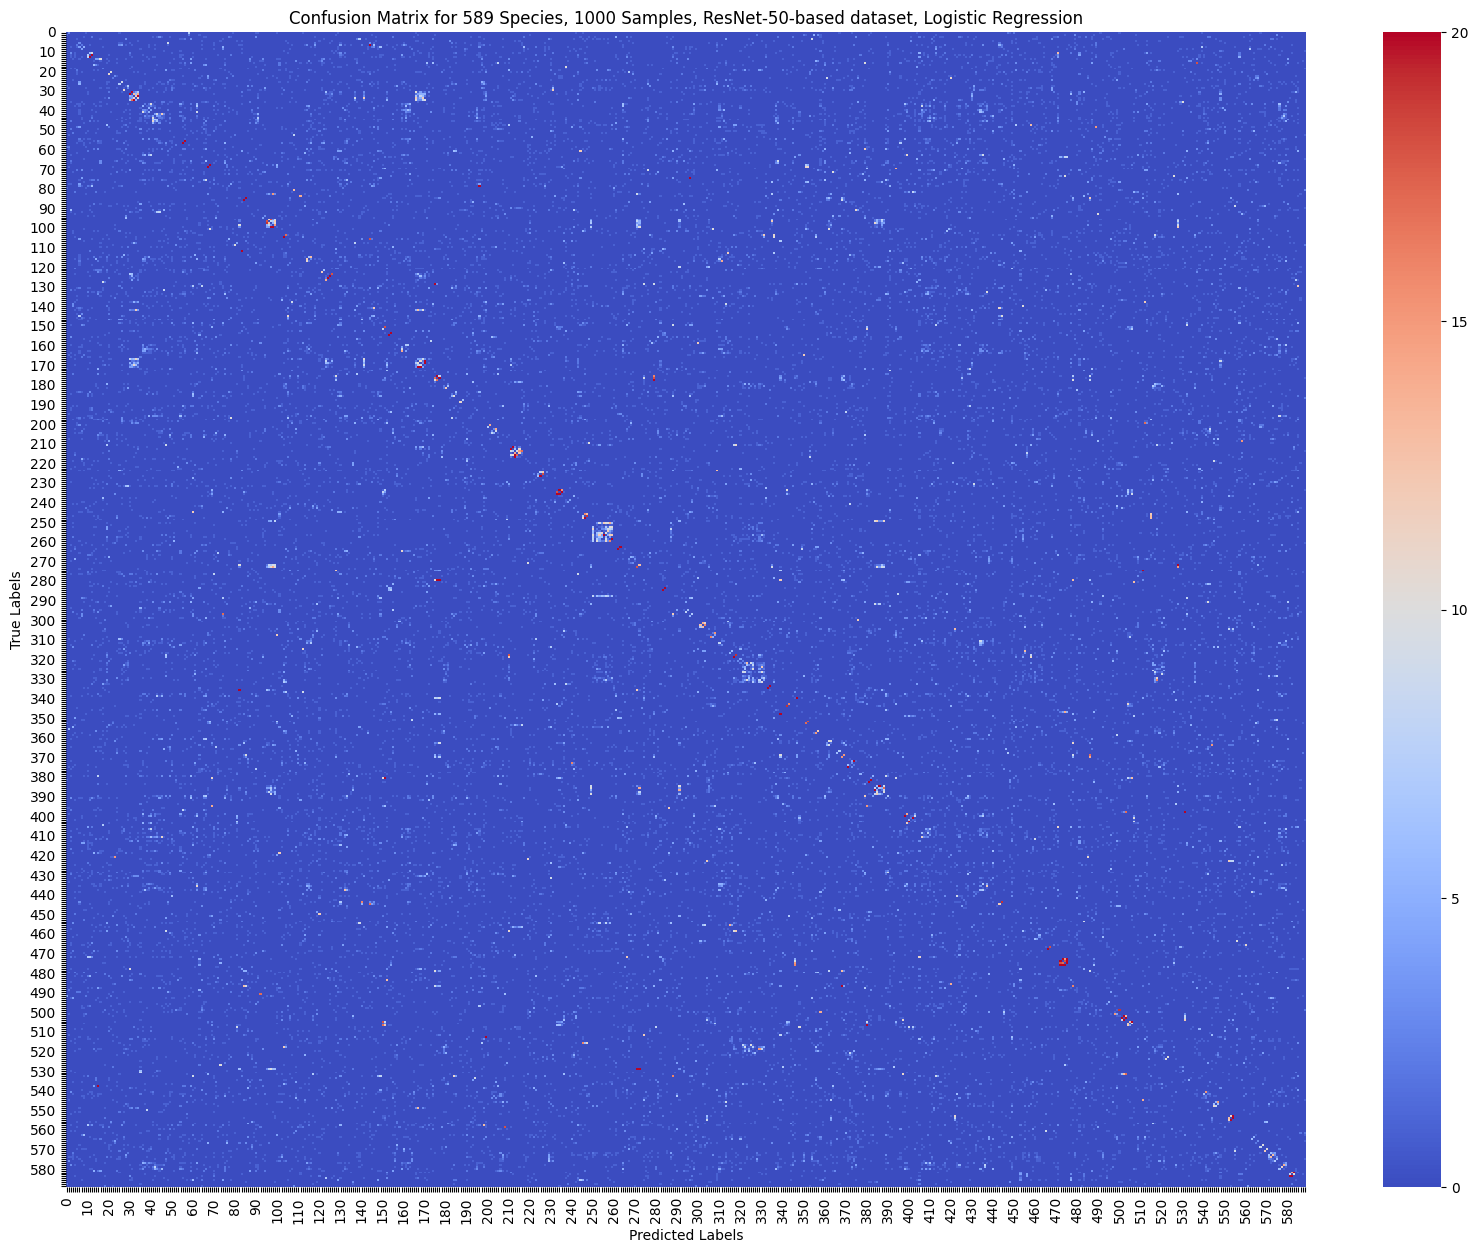

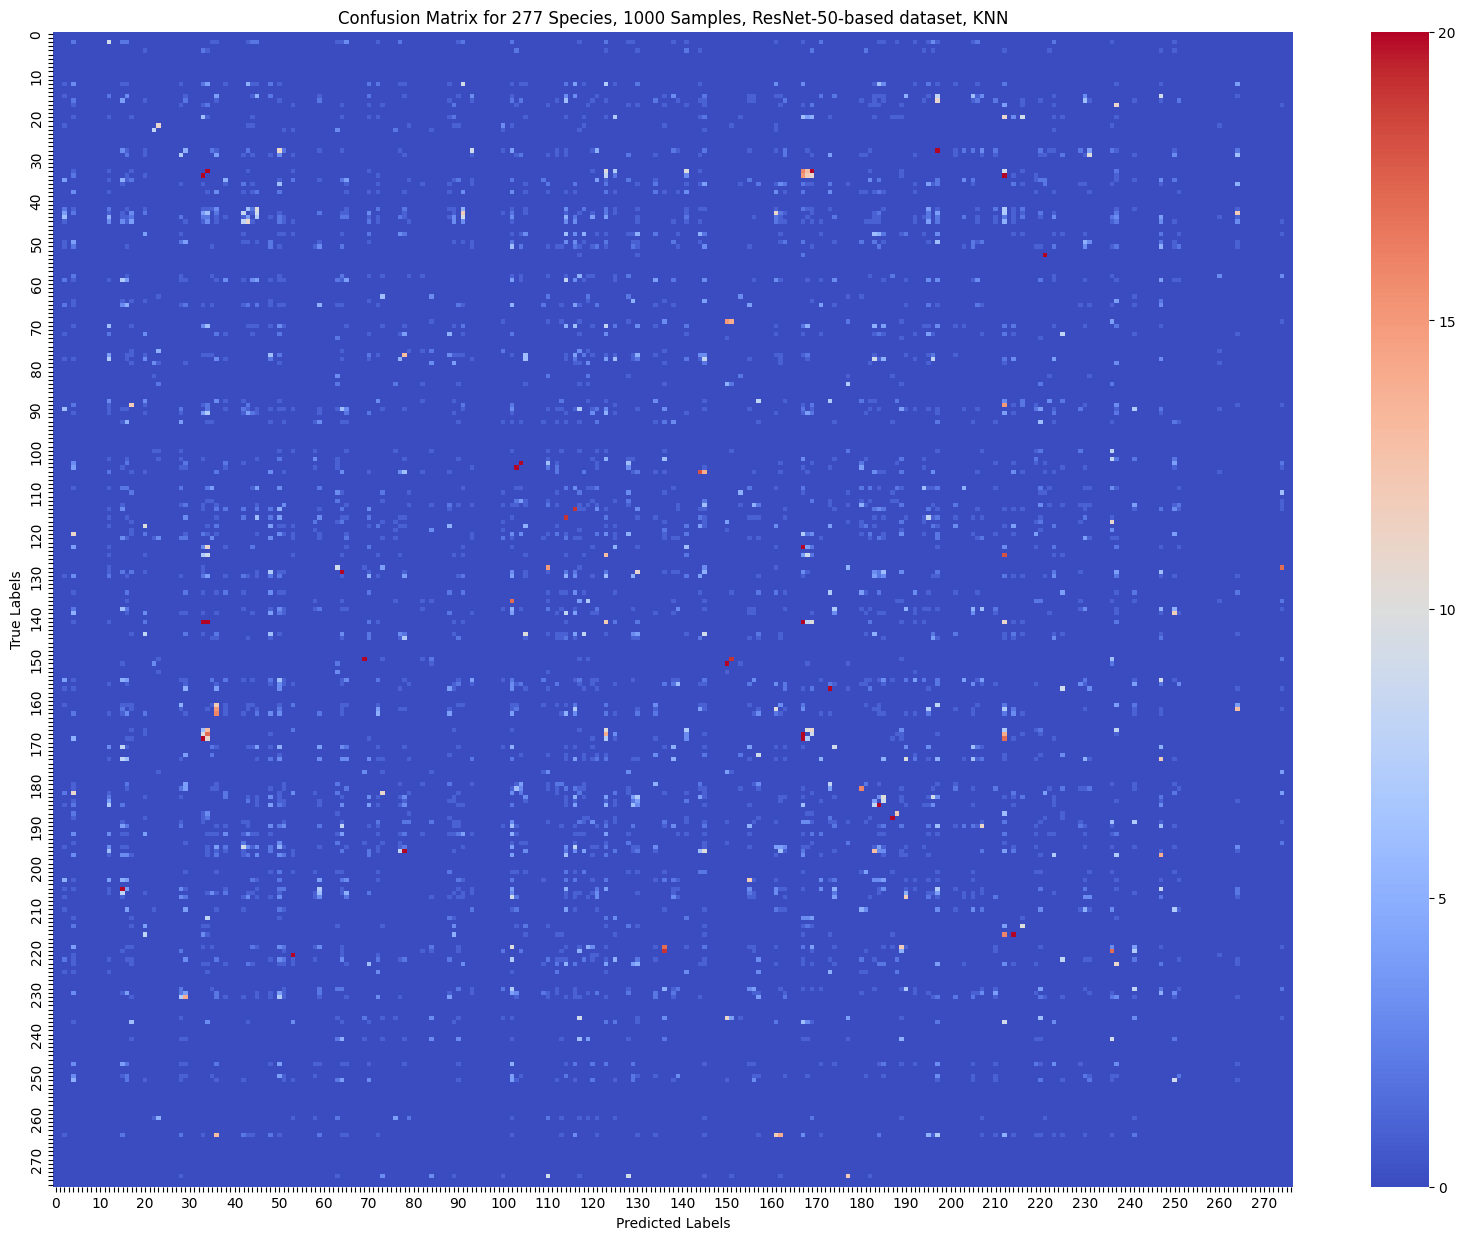

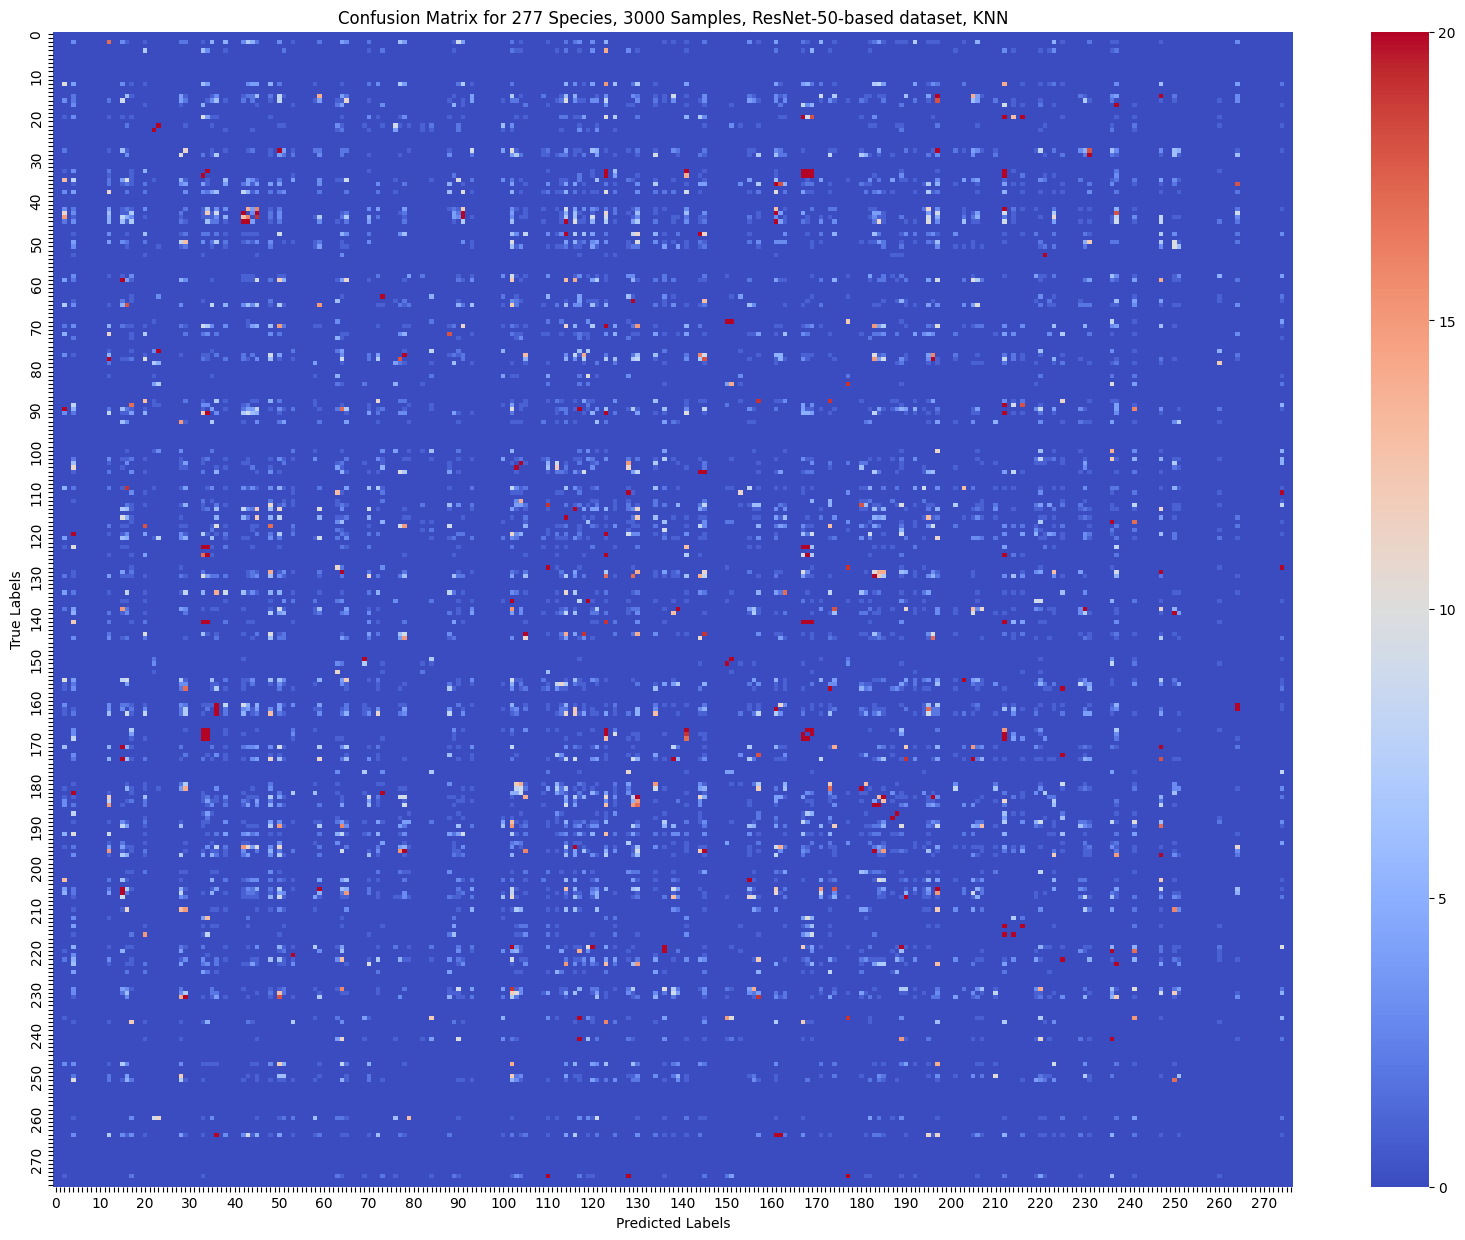

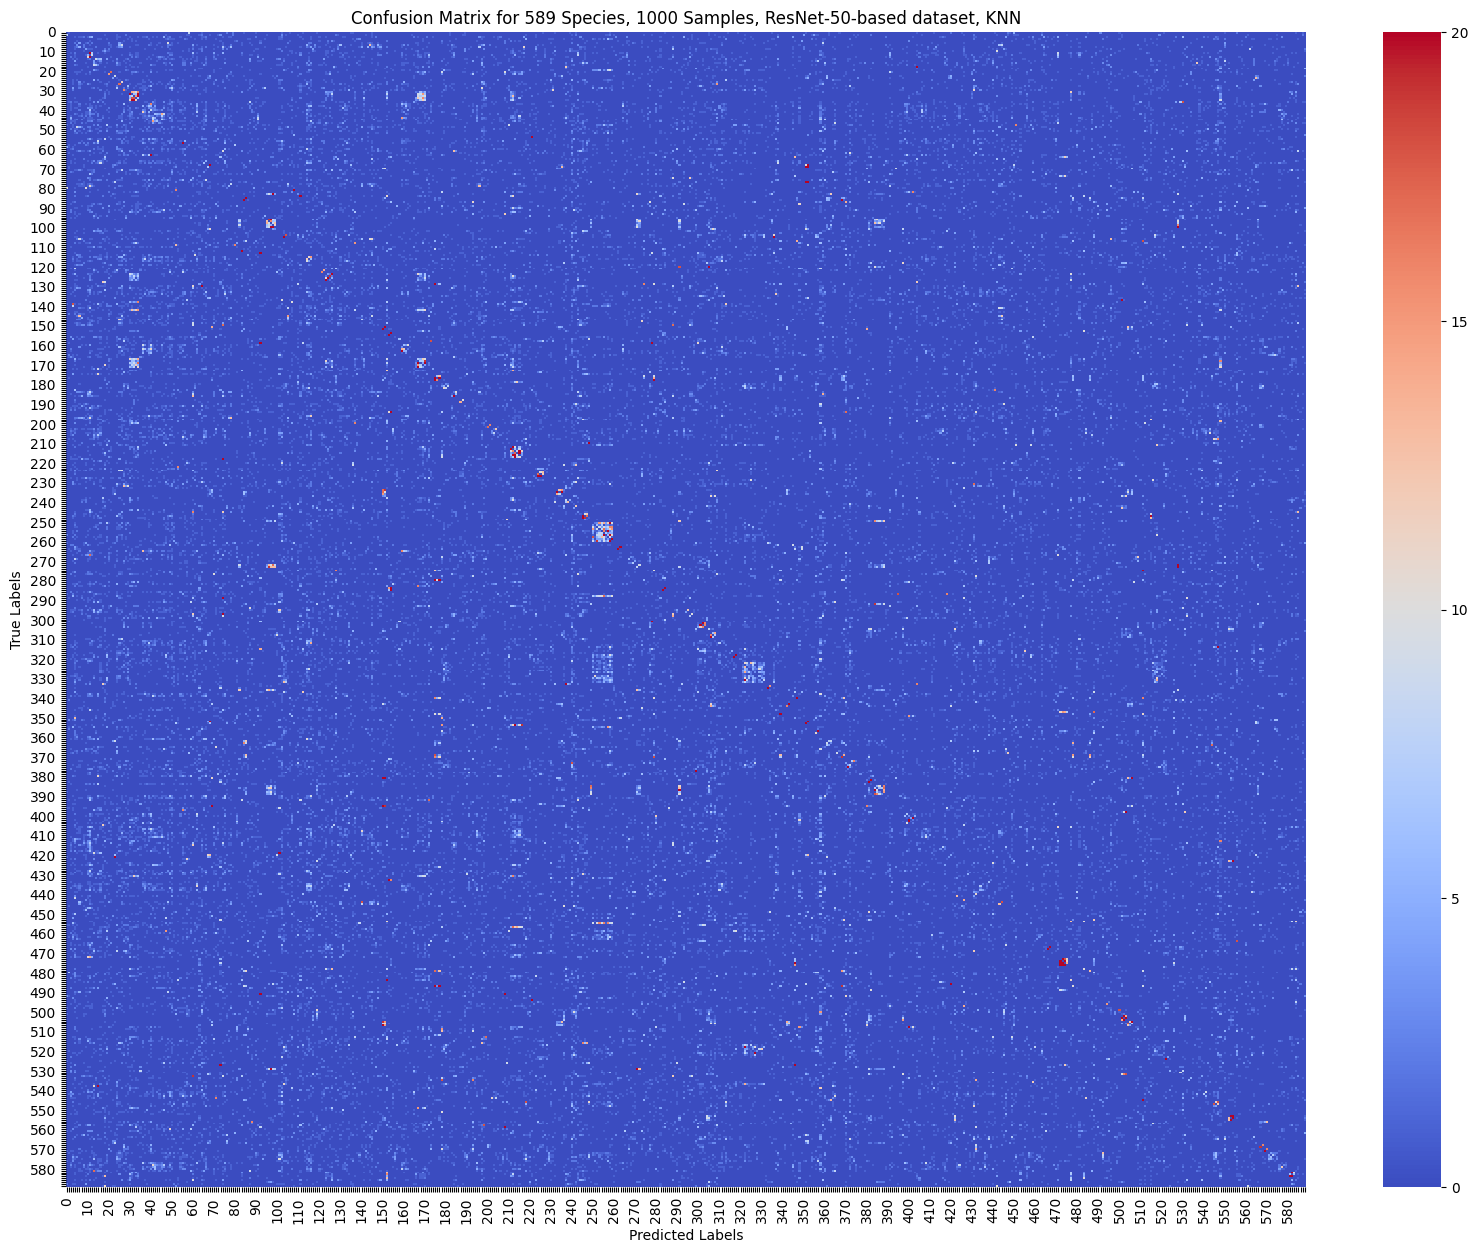

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Filter the dataframe for the specific configuration
for fm, clf in [('dino', 'Linear Classifier'), ('dino', 'KNN'), ('resnet', 'Linear Classifier'), ('resnet', 'KNN')]:
    for spec, sam in [(277, 1000), (277, 3000), (589,1000)]:

        df_for_matrix = confidences_csv[(confidences_csv['Species'] == spec) & 
                                (confidences_csv['Samples'] == sam) & 
                                (confidences_csv['FoundationalModel'] == fm) & 
                                (confidences_csv['Model'] == clf)]

        # Extract the true labels and predicted labels
        true_labels = df_for_matrix['Label']
        predicted_labels = df_for_matrix['PredictedLabel']

        # Create the confusion matrix with normalization
        conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=range(spec))#, normalize='true')

        # Set all correct classifications to 0
        for i in range(len(conf_matrix)):
            conf_matrix[i, i] = 0

        # Plot the confusion matrix
        plt.figure(figsize=(20, 15))
        sns.heatmap(
            conf_matrix, 
            annot=False, 
            cmap='coolwarm', 
            xticklabels=['' if x % 10 != 0 else x for x in range(spec)], 
            yticklabels=['' if x % 10 != 0 else x for x in range(spec)], 
            vmax=20,
            cbar_kws={'ticks': [0, 5, 10, 15, 20]}
        )
        fm_name = 'DINOv2' if fm == 'dino' else 'ResNet-50'
        clf_name = 'Logistic Regression' if clf == 'Linear Classifier' else 'KNN'
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix for '+str(spec) + ' Species, ' + str(sam) + ' Samples, ' + fm_name + '-based dataset, ' + clf_name)
        plt.show()

In [ ]:
# Create a function to calculate genus-level accuracy
def calculate_genus_accuracy(df, species_mapping):
    # Create a mapping from species to genus
    genus_mapping = {species: species.split(' ')[0] for species in species_mapping.keys()}
    
    # Create a reverse mapping from genus to list of species
    genus_to_species = {}
    for species, genus in genus_mapping.items():
        if genus not in genus_to_species:
            genus_to_species[genus] = []
        genus_to_species[genus].append(species_mapping[species])
    
    # Calculate genus-level accuracy
    correct_predictions = 0
    total_predictions = len(df)
    
    for _, row in df.iterrows():
        true_label = row['Label']
        predicted_label = row['PredictedLabel']
        
        true_genus = genus_mapping[list(species_mapping.keys())[true_label]]
        predicted_genus = genus_mapping[list(species_mapping.keys())[predicted_label]]
        
        if true_genus == predicted_genus:
            correct_predictions += 1
    
    return correct_predictions / total_predictions

# Define the dataset variants
dataset_variants = [
    ('dino', 'Linear Classifier', 277, 1000),
    ('dino', 'Linear Classifier', 277, 3000),
    ('dino', 'Linear Classifier', 589, 1000),
    ('dino', 'KNN', 277, 1000),
    ('dino', 'KNN', 277, 3000),
    ('dino', 'KNN', 589, 1000),
    ('resnet', 'Linear Classifier', 277, 1000),
    ('resnet', 'Linear Classifier', 277, 3000),
    ('resnet', 'Linear Classifier', 589, 1000),
    ('resnet', 'KNN', 277, 1000),
    ('resnet', 'KNN', 277, 3000),
    ('resnet', 'KNN', 589, 1000)
]

# Iterate over each dataset variant and calculate genus-level accuracy
for fm, clf, species, samples in dataset_variants:
    # Filter the dataframe for the current variant
    df = confidences_csv[(confidences_csv['FoundationalModel'] == fm) & 
                         (confidences_csv['Model'] == clf) & 
                         (confidences_csv['Species'] == species) & 
                         (confidences_csv['Samples'] == samples)]
    
    # Calculate genus-level accuracy
    genus_accuracy = calculate_genus_accuracy(df, species_mapping)
    
    # Print the results
    print(f"Genus-level accuracy for {fm} - {clf} - {species} species - {samples} samples: {genus_accuracy:.4f}")

Genus-level accuracy for dino - Linear Classifier - 277 species - 1000 samples: 0.9264
Genus-level accuracy for dino - Linear Classifier - 277 species - 3000 samples: 0.9416
Genus-level accuracy for dino - Linear Classifier - 589 species - 1000 samples: 0.9139
Genus-level accuracy for dino - KNN - 277 species - 1000 samples: 0.7388
Genus-level accuracy for dino - KNN - 277 species - 3000 samples: 0.7803
Genus-level accuracy for dino - KNN - 589 species - 1000 samples: 0.7070
Genus-level accuracy for resnet - Linear Classifier - 277 species - 1000 samples: 0.7043
Genus-level accuracy for resnet - Linear Classifier - 277 species - 3000 samples: 0.7285
Genus-level accuracy for resnet - Linear Classifier - 589 species - 1000 samples: 0.6600
Genus-level accuracy for resnet - KNN - 277 species - 1000 samples: 0.4425
Genus-level accuracy for resnet - KNN - 277 species - 3000 samples: 0.4927
Genus-level accuracy for resnet - KNN - 589 species - 1000 samples: 0.3941


In [ ]:
# Reverse the species_mapping dictionary to get species names from labels
label_to_species = {v: k for k, v in species_mapping.items()}

confidences_csv['GenusCorrect'] = confidences_csv.apply(lambda row: label_to_species[row['Label']].split(' ')[0] == label_to_species[row['PredictedLabel']].split(' ')[0], axis=1)

In [ ]:
confidences_csv.groupby(['Species', 'Samples', 'FoundationalModel', 'Model'])['GenusCorrect'].mean()

Species  Samples  FoundationalModel  Model            
277      500      dino               KNN                  0.704440
                                     Linear Classifier    0.907762
                  resnet             KNN                  0.404693
                                     Linear Classifier    0.667329
         1000     dino               KNN                  0.738845
                                     Linear Classifier    0.926444
                  resnet             KNN                  0.442527
                                     Linear Classifier    0.704314
         2000     dino               KNN                  0.765162
                                     Linear Classifier    0.936381
                  resnet             KNN                  0.473312
                                     Linear Classifier    0.723755
         3000     dino               KNN                  0.780266
                                     Linear Classifier    0.941567
       

In [ ]:
l = sorted([95, 256, 328, 385, 34, 168, 517, 36, 159])
for label_num in l:
    species_name = label_to_species[label_num]
    genus = species_name.split(' ')[0]
    same_genus_labels = [num for num, name in label_to_species.items() if name.startswith(genus)]
    print(f"{genus} {tuple(same_genus_labels)}")


Agrochola (36, 37, 38, 39, 40)
Conistra (159, 160, 161, 162)


Agrochola macilenta 1968643905_15218307.jpg


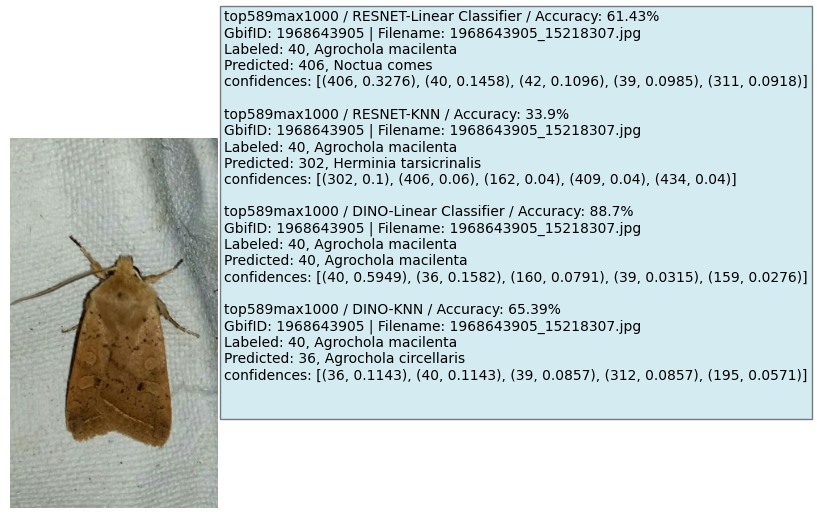

Crambus pascuella 4156039657_52417808.jpg


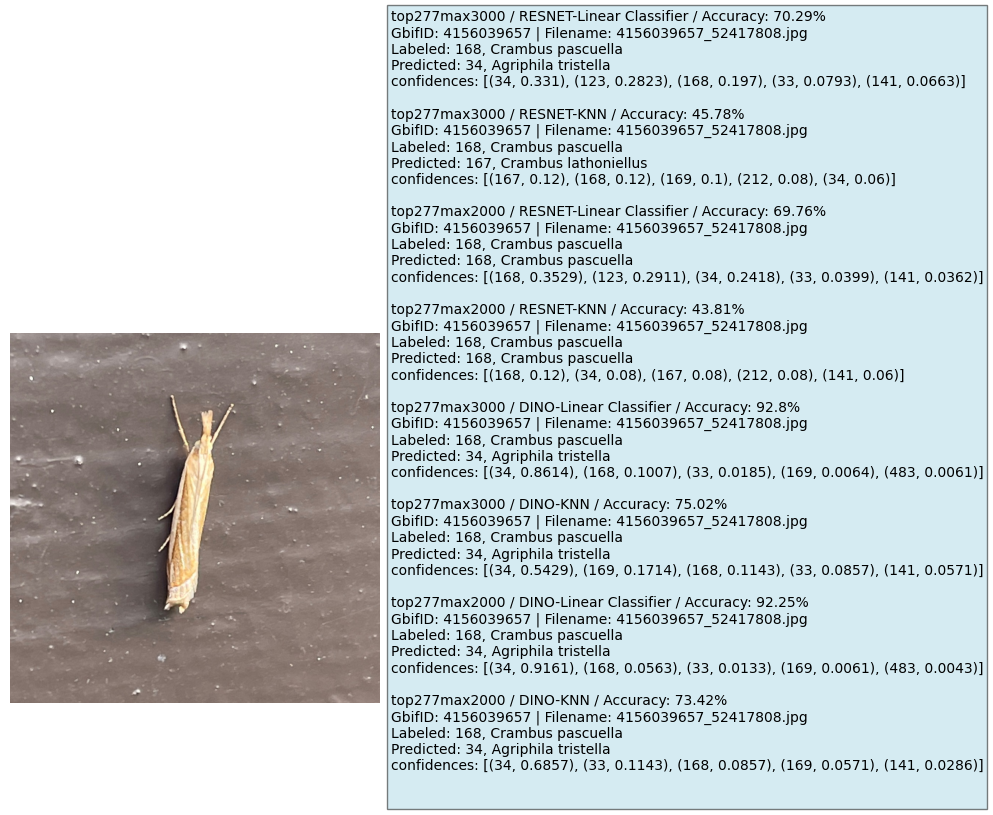

In [ ]:
show_sample_by_id(get_gbifids_for_class(40, confidences_csv, 1)[0], confidences_csv)
show_sample_by_id(get_gbifids_for_class(168, confidences_csv, 1)[0], confidences_csv)